In [470]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
from os import listdir
from os.path import isfile, join
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from matplotlib import patches
from matplotlib.collections import PatchCollection
#import matplotlib
from PIL import Image, ImageDraw
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib import pyplot
from skimage.color import rgb2gray, gray2rgb
from skimage.filters import threshold_otsu
from shapely.geometry.polygon import Polygon as Polygon_shapley
# from multiprocessing import Pool
import multiprocessing
import time
import random
import pickle
import png
from scipy.spatial import ConvexHull
import bbox_visualizer as bbv
import operator
import fileinput
import re

sys.path.insert(0, os.path.dirname(os.path.abspath('.'))) # to make imports relative to project root work

np.random.seed(0)

# Check Cell Images Malaria Dataset

Get data from https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets save it in data

In [471]:
path_uninfected = '../data/cell_images/patientid_cellmapping_uninfected.csv'
path_parasitized = '../data/cell_images/patientid_cellmapping_parasitized.csv'
# Read in the file
with open(path_uninfected, 'r') as file :
    filedata = file.read()

# Replace the target string
filedata = filedata.replace('[|]', '')

# Write the file out again
with open(path_uninfected, 'w') as file:
    file.write(filedata)


In [472]:
#read and transform data
uninfected = pd.read_csv('../data/cell_images/patientid_cellmapping_uninfected.csv', header = None)
uninfected = uninfected.set_index(0)
uninfected['imgs'] = uninfected.values.tolist()
uninfected['imgs'] = uninfected['imgs'].apply(lambda mylist: [x for x in mylist if pd.isnull(x) == False])
uninfected_df = pd.DataFrame(uninfected['imgs'], index =uninfected.index)
parasitized = pd.read_csv('../data/cell_images/patientid_cellmapping_parasitized.csv', header = None)
parasitized = parasitized.set_index(0)
parasitized['imgs'] = parasitized.values.tolist()
parasitized['imgs'] = parasitized['imgs'].apply(lambda mylist: [x for x in mylist if pd.isnull(x) == False])
parasitized_df = pd.DataFrame(parasitized['imgs'], index =parasitized.index)

In [473]:
# get additional data
uninfected_df['len_imgs'] = uninfected_df['imgs'].apply(lambda x: len(x))
parasitized_df['len_imgs'] = parasitized_df['imgs'].apply(lambda x: len(x))
uninfected_df

imgs  len_imgs
0                                                                        
C100P61ThinF  [['C100P61ThinF_IMG_20150918_144104_cell_128.p...        68
C101P62ThinF  [['C101P62ThinF_IMG_20150918_151006_cell_17.pn...        71
C102P63ThinF  [['C102P63ThinF_IMG_20150918_161508_cell_101.p...        68
C103P64ThinF  [['C103P64ThinF_IMG_20150918_164250_cell_121.p...        68
C104P65ThinF  [['C104P65ThinF_IMG_20150918_170850_cell_140.p...        72
...                                                         ...       ...
C95P56ThinF   [['C95P56ThinF_IMG_20150821_171242_cell_21.png...        68
C96P57ThinF   [['C96P57ThinF_IMG_20150824_105213_cell_119.pn...        67
C97P58ThinF   [['C97P58ThinF_IMG_20150917_145555_cell_103.pn...        65
C98P59ThinF   [['C98P59ThinF_IMG_20150917_153030_cell_120.pn...        69
C99P60ThinF   [['C99P60ThinF_IMG_20150918_140900_cell_24.png...        68

[201 rows x 2 columns]

In [474]:
parasitized_df

imgs  len_imgs
0                                                                        
C100P61ThinF  [['C100P61ThinF_IMG_20150918_144104_cell_162.p...        57
C101P62ThinF  [['C101P62ThinF_IMG_20150918_151006_cell_61.pn...       314
C102P63ThinF  [['C102P63ThinF_IMG_20150918_161508_cell_190.p...        35
C103P64ThinF  [['C103P64ThinF_IMG_20150918_164250_cell_170.p...        39
C104P65ThinF  [['C104P65ThinF_IMG_20150918_170850_cell_204.p...        10
...                                                         ...       ...
C95P56ThinF   [['C95P56ThinF_IMG_20150821_171242_cell_100.pn...        24
C96P57ThinF   [['C96P57ThinF_IMG_20150824_105213_cell_207.pn...        19
C97P58ThinF   [['C97P58ThinF_IMG_20150917_145555_cell_165.pn...       245
C98P59ThinF   [['C98P59ThinF_IMG_20150917_153030_cell_156.pn...        39
C99P60ThinF   [['C99P60ThinF_IMG_20150918_140900_cell_100.pn...       564

[151 rows x 2 columns]

##### Patient Nr. 8 has two entries.


In [475]:
def get_patient_id(lst):
    for item in lst:
        try:
            return int(re.search('P[0-9]*', item).group(0)[1:])
        except Exception as e:
            print(e)

uninfected_df['patient_n'] = uninfected_df['imgs'].apply(lambda x: get_patient_id(x))
parasitized_df['patient_n'] = parasitized_df['imgs'].apply(lambda x: get_patient_id(x))

'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' 

'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' 

In [476]:
parasitized_df['patient_n'].duplicated().value_counts()

False    150
True       1
Name: patient_n, dtype: int64

In [477]:
parasitized_df[parasitized_df['patient_n'].duplicated() == True]

imgs  \
0                                                                             
C47P8thin_Original_Motic  [['C47P8thin_Original_Motic_IMG_20150714_09351...   

                          len_imgs  patient_n  
0                                              
C47P8thin_Original_Motic         8          8

In [478]:
parasitized_df[parasitized_df['patient_n'] == 8]

imgs  \
0                                                                                 
C47P8thinOriginalOlympusCX21  [['C47P8thinOriginalOlympusCX21_IMG_20150717_1...   
C47P8thin_Original_Motic      [['C47P8thin_Original_Motic_IMG_20150714_09351...   

                              len_imgs  patient_n  
0                                                  
C47P8thinOriginalOlympusCX21         2          8  
C47P8thin_Original_Motic             8          8

In [479]:
uninfected_df[uninfected_df['patient_n'].isna()]

imgs  len_imgs  \
0                                                                              
C12NThinF        [['C12NThinF_IMG_20150614_124212_cell_111.png'...        68   
C13NThinF        [['C13NThinF_IMG_20150614_131318_cell_102.png'...        69   
C1_thinF         [['C1_thinF_IMG_20150604_104722_cell_115.png',...        70   
C201ThinF        [['C201ThinF_IMG_20150930_142848_cell_106.png'...        68   
C202ThinF        [['C202ThinF_IMG_20151015_151254_cell_118.png'...        65   
C203ThinF        [['C203ThinF_IMG_20151029_102123_cell_108.png'...        69   
C204ThinF        [['C204ThinF_IMG_20151029_110627_cell_102.png'...        67   
C205ThinF        [['C205ThinF_IMG_20151106_151514_cell_117.png'...        69   
C206ThinF        [['C206ThinF_IMG_20151029_140511_cell_112.png'...        71   
C207ThinF        [['C207ThinF_IMG_20151029_143711_cell_105.png'...        70   
C208ThinF        [['C208ThinF_IMG_20151029_151017_cell_107.png'...        69   
C209ThinF        [['C209ThinF_IMG_20151029_160721_cell_10.png',...        71   
C210ThinF        [['C210ThinF_IMG_20151029_162357_cell_107.png'...        68   
C211ThinF        [['C211ThinF_IMG_20151029_163959_cell_104.png'...        69   
C212ThinF        [['C212ThinF_IMG_20151106_105437_cell_132.png'...        68   
C213ThinF        [['C213ThinF_IMG_20151106_112252_cell_155.png'...        69   
C214ThinF        [['C214ThinF_IMG_20151106_114526_cell_13.png',...        67   
C215ThinF        [['C215ThinF_IMG_20151106_133012_cell_127.png'...        69   
C216ThinF        [['C216ThinF_IMG_20151106_134733_cell_105.png'...        68   
C217ThinF        [['C217ThinF_IMG_20151106_141135_cell_122.png'...        69   
C218ThinF        [['C218ThinF_IMG_20151106_143940_cell_145.png'...        69   
C219ThinF        [['C219ThinF_IMG_20151106_145856_cell_124.png'...        66   
C220ThinF        [['C220ThinF_IMG_20151106_153947_cell_108.png'...        68   
C221ThinF        [['C221ThinF_IMG_20151106_155857_cell_13.png',...        70   
C222ThinF        [['C222ThinF_IMG_20151115_150057_cell_104.png'...        69   
C223ThinF        [['C223ThinF_IMG_20151112_103809_cell_101.png'...        68   
C224ThinF        [['C224ThinF_IMG_20151112_111955_cell_105.png'...        67   
C225ThinF        [['C225ThinF_IMG_20151112_113735_cell_111.png'...        67   
C226ThinF        [['C226ThinF_IMG_20151112_131255_cell_141.png'...        68   
C227ThinF        [['C227ThinF_IMG_20151112_135158_cell_122.png'...        68   
C228ThinF        [['C228ThinF_IMG_20151112_142109_cell_100.png'...        66   
C229ThinF        [['C229ThinF_IMG_20151112_144147_cell_130.png'...        69   
C230ThinF        [['C230ThinF_IMG_20151112_150329_cell_138.png'...        68   
C231ThinF        [['C231ThinF_IMG_20151112_152234_cell_1.png', ...        70   
C232ThinF        [['C232ThinF_IMG_20151112_154211_cell_112.png'...        69   
C233ThinF        [['C233ThinF_IMG_20151112_160059_cell_114.png'...        68   
C234ThinF        [['C234ThinF_IMG_20151112_162759_cell_106.png'...        65   
C235ThinF        [['C235ThinF_IMG_20151112_164625_cell_119.png'...        68   
C236ThinF        [['C236ThinF_IMG_20151127_102115_cell_104.png'...        68   
C237ThinF        [['C237ThinF_IMG_20151127_104748_cell_110.png'...        68   
C238NThinF       [['C238NThinF_IMG_20151207_114038_cell_106.png...        70   
C239ThinF        [['C239ThinF_IMG_20151127_113008_cell_1.png', ...        69   
C240ThinF        [['C240ThinF_IMG_20151127_115223_cell_105.png'...        65   
C241NThinF       [['C241NThinF_IMG_20151207_124030_cell_129.png...        68   
C2NThinF         [['C2NThinF_IMG_20150604_114631_cell_141.png',...        69   
C3thin_original  [['C3thin_original_IMG_20150608_162835_cell_10...        69   
C4thin_original  [['C4thin_original_IMG_20150608_165540_cell_16...        67   
C5NThinF         [['C5NThinF_IMG_20150609_122006_cell_109.png',...        69   
C6NThinF         [['C6NThinF_IMG_20150609_121955_cell_104.png'

In [480]:
len(uninfected_df[uninfected_df['patient_n'].isna()])

50

In [481]:
len(parasitized_df[parasitized_df['patient_n'].isna()])

0

In [482]:
uninfected_df['len_imgs'].sum()

13779

In [483]:
parasitized_df['len_imgs'].sum()

13779

In [484]:
uninfected_df['len_imgs'].sum() + parasitized_df['len_imgs'].sum()

27558

# Check Bounding Boxex NIH

First download files from ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/NIH-NLM-ThinBloodSmearsPf/ to folder (see the terminal comand below) e.g.

NIH_NLM_ThinBloodSmears <br>
└-Point Set <br>
└-Polygon Set <br>
Notebooks <br>
└-IH_bounding_boxes.ipynb <br>

In the Terminal navigate to the folder you want your data in (**cd** then drag and drop the folder) then enter following:

wget -r -np ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/NIH-NLM-ThinBloodSmearsPf/

(you might need to install wget with **brew install wget** and if you do not have brew then install homebrew https://brew.sh/)


In [485]:
def get_txt(path):
    list_txt = []
    # Delimiter
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".txt"):
                txt_path = os.path.join(root, file)
                list_txt.append(txt_path)
    return list_txt


def txt_to_df(path):
    data_file_delimiter = ','
    df = pd.DataFrame(columns = [ 'Patient no - Cell no','cell', 'comment', 'annotation_type','Number of points', 'position', 'filename', 'txt_path', 'img_path'])
    root, file = os.path.split(path)
    filename, file_extension = os.path.splitext(file)
    txt_path = os.path.join(root, file)
    img_path = os.path.join(root.replace("GT", "Img"), filename +'.jpg')
    # Loop the data lines
    with open(txt_path, 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()
        lines.pop(0)
        for l in lines:
            # Count the column count for the current line
            columns = l.split(data_file_delimiter)
            list_locations = [int(float(location)) for location in columns[5:]]
            zip_locations = list(zip(list_locations[::2], list_locations[1::2]))
            df = df.append( {'Patient no - Cell no': columns[0], 'cell': columns[1], 'comment': columns[2], 'annotation_type': columns[3], \
                'Number of points': columns[4], 'position': zip_locations, 'filename': filename, 'txt_path': txt_path, 'img_path': img_path}, ignore_index = True)
    return df

def collect_results(df_collected):
    """Uses apply_async's callback to setup up a separate Queue for each process"""
    global df
    df = df.append(df_collected)


In [486]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

def draw_points(img, cell, annotation, position, row, rows = 1, columns = 1, i = 1, point_size = 15):
    colour = (0,255,0) if cell == 'Uninfected' \
        else (255,0, 0) if cell == 'Parasitized' \
            else (128,0, 128) if cell == 'Platelet' \
                else (0, 0, 255) if cell == 'White_Blood_Cell' \
                    else (255,215,0)

    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(row['filename'])

    if annotation == 'Point':
        x = position[0][0] 
        y = position[0][1] 
        cv2.circle(img, position[0], 1, colour, point_size)
    
    elif annotation == 'Polygon':
        if len(position) < 3:
            print('row: ', row)
        if not len(position) < 3:
            poly = Polygon_shapley(position)
            x,y = poly.exterior.xy
            ax.plot(x, y, color=rgb_to_hex(colour), alpha=0.7,
                linewidth=3, solid_capstyle='round', zorder=2)


In [487]:
txt_list = get_txt('../data/NIH-NLM-ThinBloodSmearsPf')
print(len(txt_list))

965


**The following operation takes a while lean back and get a coffee**

In [488]:
df = pd.DataFrame(columns = [ 'Patient no - Cell no','cell', 'comment', 'annotation_type','Number of points', 'position', 'filename', 'txt_path', 'img_path'])
start_time = time.time()  

# Repeats the compute intensive operation on all available cores
pool = multiprocessing.Pool(processes = multiprocessing.cpu_count())
pool.map_async(txt_to_df, txt_list, callback = collect_results)
pool.close()
pool.join()

# Converts list of lists to a data frame
print(df.shape)
print("--- %s seconds ---" % (time.time() - start_time))

(196934, 9)
--- 146.09387516975403 seconds ---


In [489]:
def get_bbx(position, annotation_type, bb_pixel):
    if annotation_type == 'Polygon':
        poly_list = np.array([list(ele) for ele in position])
        x_min = np.nanmin(poly_list[:, 0])
        x_max = np.nanmax(poly_list[:, 0])
        y_min = np.nanmin(poly_list[:, 1])
        y_max = np.nanmax(poly_list[:, 1])
        return [x_min, y_min, x_max, y_max]
    if annotation_type == 'Point':
        point_list = np.array(position)
        x_min = int(point_list[:, 0] - 0.5 * bb_pixel)
        x_max = int(point_list[:, 0] + 0.5 * bb_pixel)
        y_min = int(point_list[:, 1] - 0.5 * bb_pixel)
        y_max = int(point_list[:, 1] + 0.5 * bb_pixel)
        return [x_min, y_min, x_max, y_max]

In [490]:
df['bbx'] = df.apply(lambda row: get_bbx(row['position'], row['annotation_type'], 140), axis = 1)
df

Patient no - Cell no        cell     comment annotation_type  \
0                    3-1  Uninfected  No_comment         Polygon   
1                    3-2  Uninfected  No_comment         Polygon   
2                    3-3  Uninfected  No_comment         Polygon   
3                    3-4  Uninfected  No_comment         Polygon   
4                    3-5  Uninfected  No_comment         Polygon   
..                   ...         ...         ...             ...   
199                5-200  Uninfected  No_Comment           Point   
200                5-201  Uninfected  No_Comment           Point   
201                5-202  Uninfected  No_Comment           Point   
202                5-203  Uninfected  No_Comment           Point   
203                5-204  Uninfected  No_Comment           Point   

    Number of points                                           position  \
0                 14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1                 15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2                 14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3                 14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4                 14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   
..               ...                                                ...   
199                1                                      [(2080, 643)]   
200                1                                      [(1790, 606)]   
201                1                                      [(1757, 756)]   
202                1                                      [(1860, 856)]   
203                1                                      [(1623, 683)]   

                filename                                           txt_path  \
0    IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1    IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2    IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3    IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4    IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
..                   ...                                                ...   
199  IMG_20151115_181859  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
200  IMG_20151115_181859  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
201  IMG_20151115_181859  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
202  IMG_20151115_181859  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
203  IMG_20151115_181859  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                              img_path                     bbx  
0    ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   [2905, 33, 3033, 131]  
1    ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2951, 141, 3071, 272]  
2    ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2658, 135, 2801, 276]  
3    ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2332, 137, 2454, 265]  
4    ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2499, 140, 2631, 272]  
..                                                 ...                     ...  
199  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  [2010, 573, 2150, 713]  
200  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  [1720, 536, 1860, 676]  
201  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  [1687, 686, 1827, 826]  
202  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  [1790, 786, 1930, 926]  
203  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  [1553, 613, 1693, 753]  

[196934 rows x 10 columns]

In [491]:
fake_patient_id = {}
counter = 200
def get_patient_id_path(path):
    '''function takes path to get patient ID,
    when patient ID is not available from path, take fake patient ID'''
    global counter
    try:
        return int(re.search('P[0-9][0-9]*', path).group(0)[1:])
    except Exception as e:
        path_patient_folder = re.search('.*/Img/', path).group(0)
        #print(path_patient_folder)
        try:
            return fake_patient_id[path_patient_folder]
        except:
            counter += 1
            fake_patient_id[path_patient_folder] = counter
            return counter
            

In [492]:
df['patient_n_path'] = df['img_path'].apply(lambda row: get_patient_id_path(row))

In [493]:
fake_patient_id

{'../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/302C210ThinF/Img/': 201,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/323C231ThinF/Img/': 202,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/309C216ThinF/Img/': 203,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/306C213ThinF/Img/': 204,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/305C212ThinF/Img/': 205,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/327C235ThinF/Img/': 206,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/318C226ThinF/Img/': 207,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/244C7NthinF/Img/': 208,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/377C238NThinF/Img/': 209,
 '../data/NIH-NLM-ThinBloodSmearsPf/Point Set/328C222ThinF/Img/': 210,
 '../data/NIH-NLM-ThinBloodSmearsPf/Point Set/321C229ThinF/Img/': 211,
 '../data/NIH-NLM-ThinBloodSmearsPf/Point Set/239C12NThinF/Img/': 212,
 '../data/NIH-NLM-ThinBloodSmearsPf/Point Set/300C208ThinF/Img/': 213,
 '../data/NIH-NLM-ThinBloodSmearsPf/Point Set/376C237ThinF/

In [494]:
len(df[df['annotation_type'] == 'Polygon']['patient_n_path'].unique())

33

In [495]:
df.reset_index(drop=True, inplace = True)
pickle_labels = open('../data/pickled/labels.pkl', 'wb') 
pickle.dump(df, pickle_labels)

In [496]:
df = pd.read_pickle('../data/pickled/labels.pkl')

In [497]:
df

Patient no - Cell no        cell     comment annotation_type  \
0                       3-1  Uninfected  No_comment         Polygon   
1                       3-2  Uninfected  No_comment         Polygon   
2                       3-3  Uninfected  No_comment         Polygon   
3                       3-4  Uninfected  No_comment         Polygon   
4                       3-5  Uninfected  No_comment         Polygon   
...                     ...         ...         ...             ...   
196929                5-200  Uninfected  No_Comment           Point   
196930                5-201  Uninfected  No_Comment           Point   
196931                5-202  Uninfected  No_Comment           Point   
196932                5-203  Uninfected  No_Comment           Point   
196933                5-204  Uninfected  No_Comment           Point   

       Number of points                                           position  \
0                    14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1                    15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2                    14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3                    14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4                    14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   
...                 ...                                                ...   
196929                1                                      [(2080, 643)]   
196930                1                                      [(1790, 606)]   
196931                1                                      [(1757, 756)]   
196932                1                                      [(1860, 856)]   
196933                1                                      [(1623, 683)]   

                   filename  \
0       IMG_20150817_103139   
1       IMG_20150817_103139   
2       IMG_20150817_103139   
3       IMG_20150817_103139   
4       IMG_20150817_103139   
...                     ...   
196929  IMG_20151115_181859   
196930  IMG_20151115_181859   
196931  IMG_20151115_181859   
196932  IMG_20151115_181859   
196933  IMG_20151115_181859   

                                                 txt_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                                 img_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                           bbx  patient_n_path  
0        [2905, 33, 3033, 131]              40  
1       [2951, 141, 3071, 272]              40  
2       [2658, 135, 2801, 276]              40  
3       [2332, 137, 2454, 265]              40  
4       [2499, 140, 2631, 272]              40  
...                        ...             ...  
196929  [2010, 573, 2150, 713]     

In [498]:
# df = pd.read_csv(gt_path, sep = ',', header = 0, names= [ '?','cell', 'comment', 'annotation_type','??', 'y', 'x'])
df['cell'].value_counts()

Uninfected          188711
Parasitized           7952
White_Blood_Cell       271
Name: cell, dtype: int64

In [499]:
df_points = df[df['annotation_type'] == 'Point']
df_points.groupby(['filename']).count()['cell'].mean()

203.3375

In [500]:
# df['position_len'] = df['position'].apply(lambda x: len(x))
# short_polygon = df.loc[(df['annotation_type'] == 'Polygon') & (df['position_len'] < 3)] 
# short_polygon.to_csv('short_polygon.csv', index = False)

In [501]:
filename =  'IMG_20150621_112043' #'IMG_20150623_134547' 
df_file = df[df['filename'] == filename]
df_file

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  \
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                  ...   
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                            bbx  patient_n_path  
15193  [3575, 1304, 3727, 1432]               3  
15194  [1441, 1202, 1568, 1307]               3  
15195  [2856, 1398, 2960, 1541]               3  
15196  [2982, 1460, 3091, 1578]               3  
15197  [3043, 1651, 3169, 1788]               3  
...                         ...             ...  
15397  [3289, 1194, 3419, 1331]               3  
15398  [3346, 1375, 3496, 1515]               3  
15399  [3259, 1511, 3400, 1647]               3  
15400  [3104, 1532, 3255, 1679]   

In [502]:
df_file[df_file['position'].str.len() > 0]

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  \
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                  ...   
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                            bbx  patient_n_path  
15193  [3575, 1304, 3727, 1432]               3  
15194  [1441, 1202, 1568, 1307]               3  
15195  [2856, 1398, 2960, 1541]               3  
15196  [2982, 1460, 3091, 1578]               3  
15197  [3043, 1651, 3169, 1788]               3  
...                         ...             ...  
15397  [3289, 1194, 3419, 1331]               3  
15398  [3346, 1375, 3496, 1515]               3  
15399  [3259, 1511, 3400, 1647]               3  
15400  [3104, 1532, 3255, 1679]   

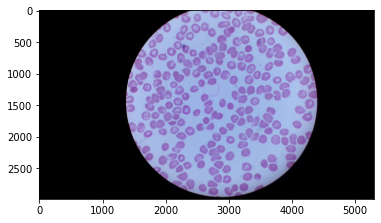

In [503]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
#img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
# img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
#img = cv2.flip(img, 1)
plt.imshow(img)

In [504]:
# cv2.circle(img, df_file['position'][240][0], 1, (0,255,0), 50)
# plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


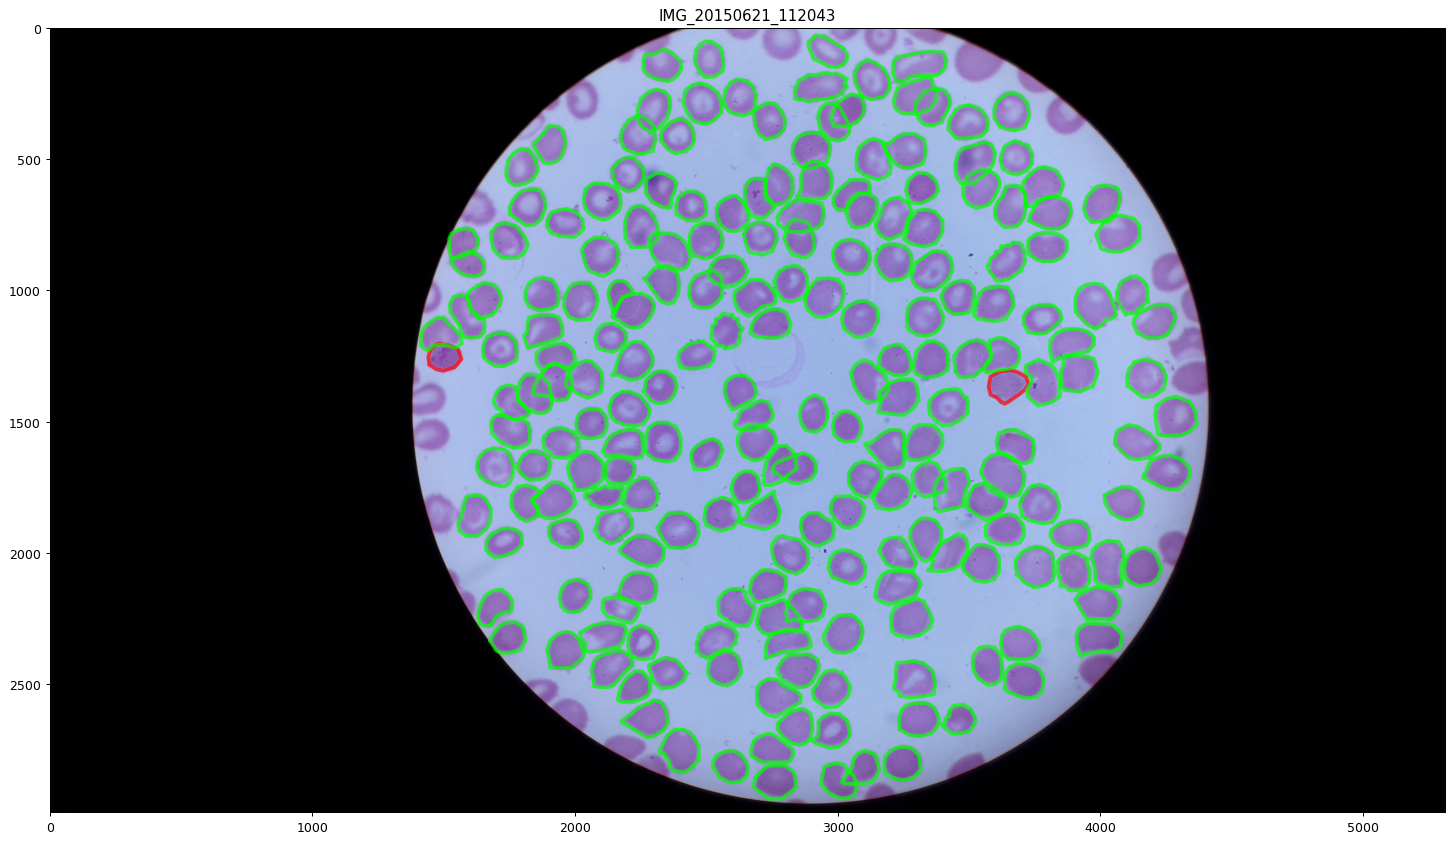

In [505]:
fig = plt.figure(1, figsize=(20,20), dpi=90)
df_file.apply(lambda row: draw_points(img, row['cell'], row['annotation_type'], row['position'], row), axis = 1)
plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


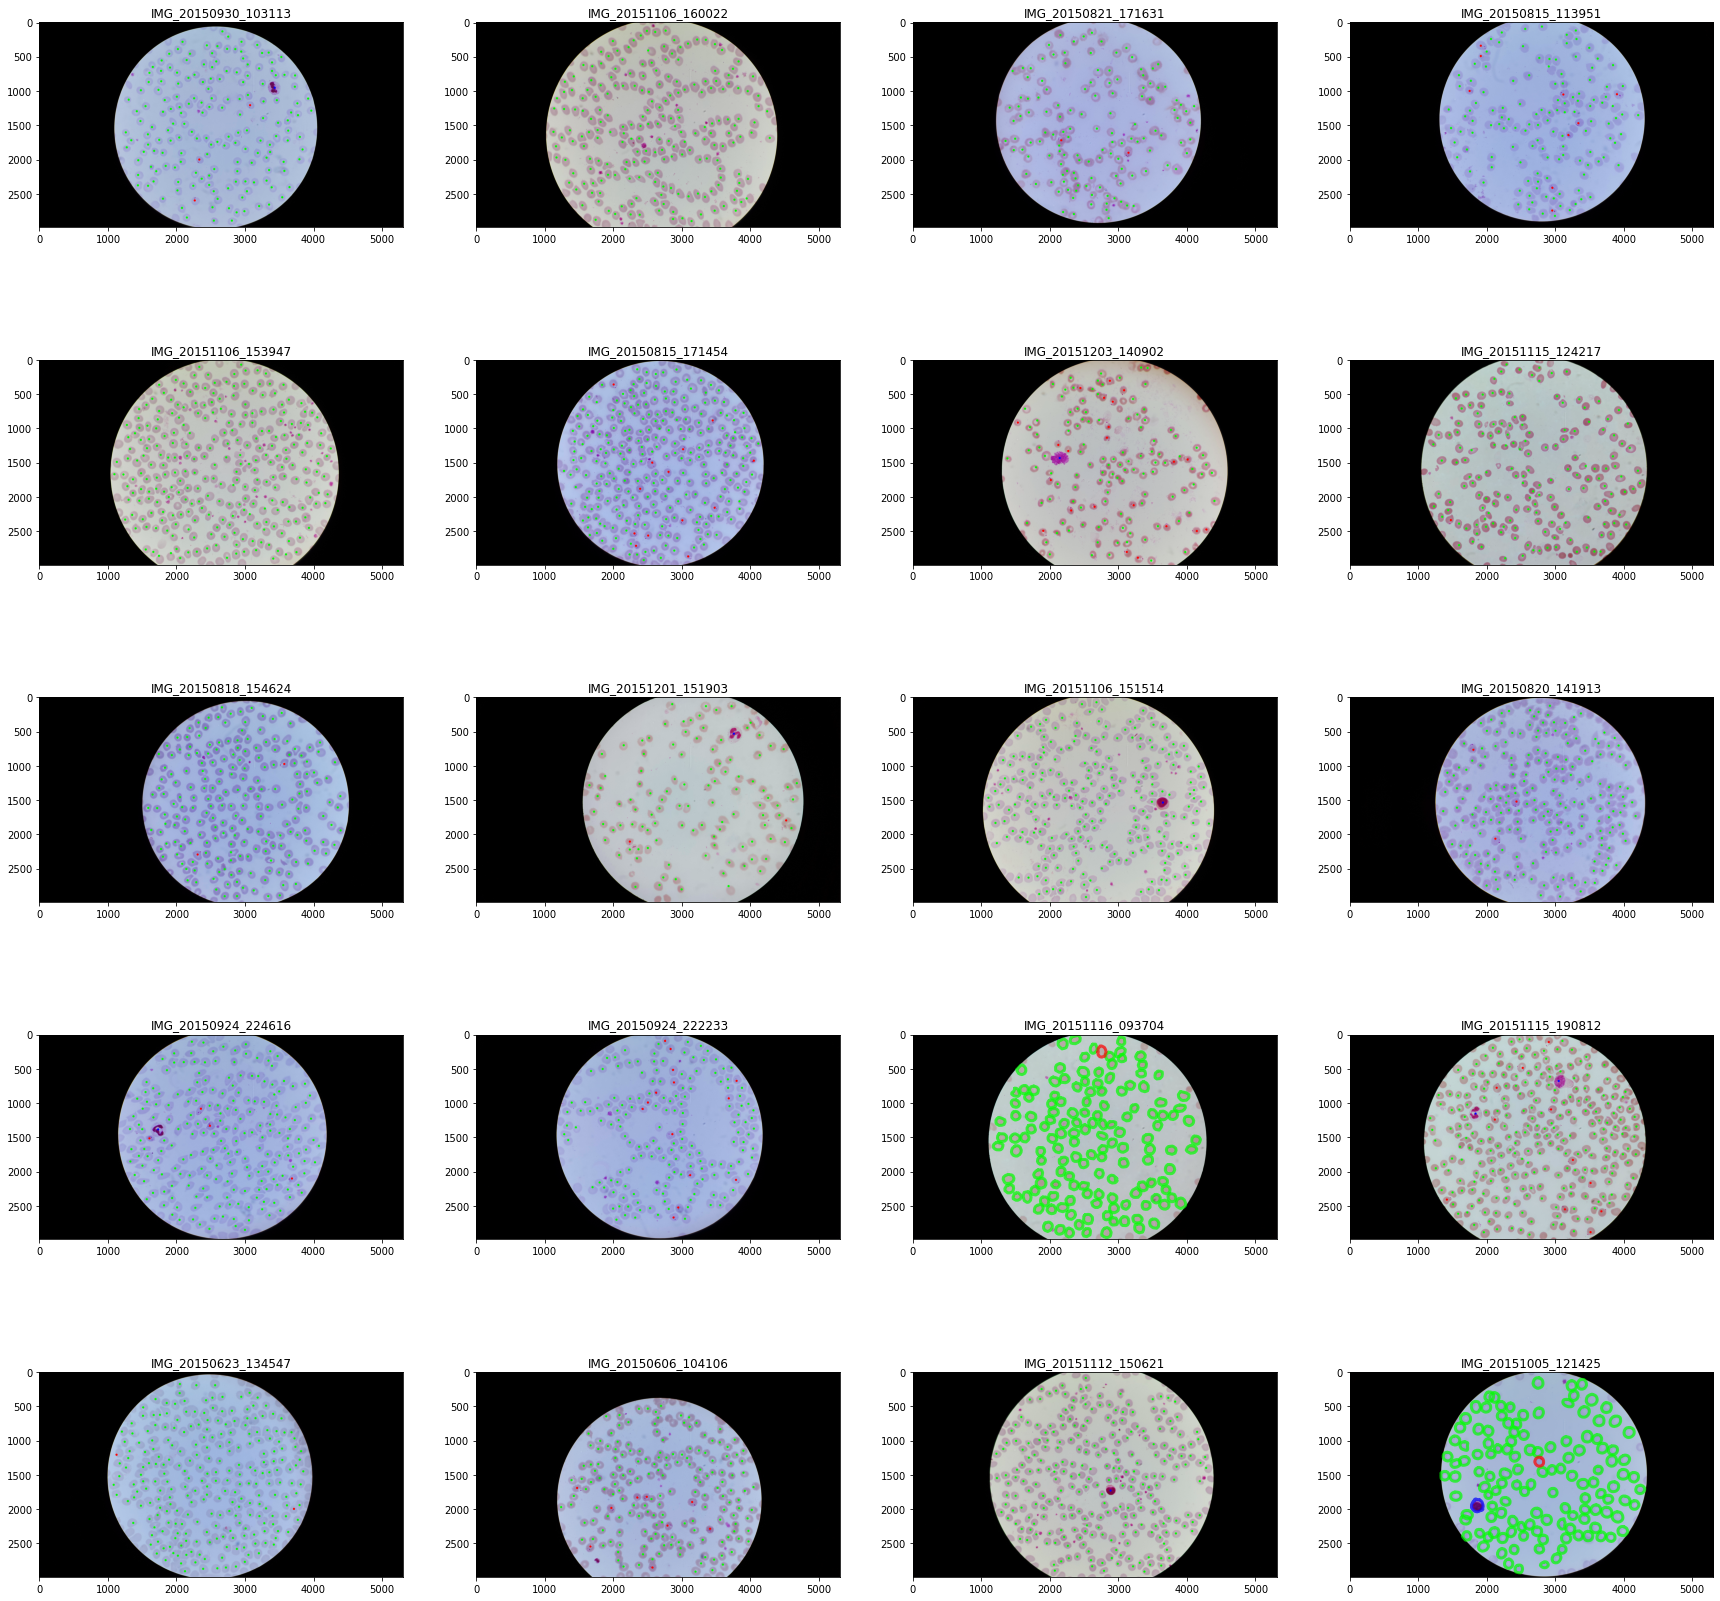

In [506]:
secure_random = random.SystemRandom()

w, h = 10, 10
fig=plt.figure(figsize=(30, 30))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    filename = secure_random.choice(df['filename'].unique())
    df_file = df[df['filename'] == filename]
    #print(filename)
    img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
    df_file.apply(lambda row: draw_points(img, row['cell'], row['annotation_type'], row['position'], row = row, rows = rows, columns = columns, i = i, point_size= 30), axis = 1)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Polygons to mask

In [507]:
def poly_mask(row):
    poly = Polygon(row['position'])
    mask = poly.ravel().tolist()

In [508]:
filename =  'IMG_20150820_124943'

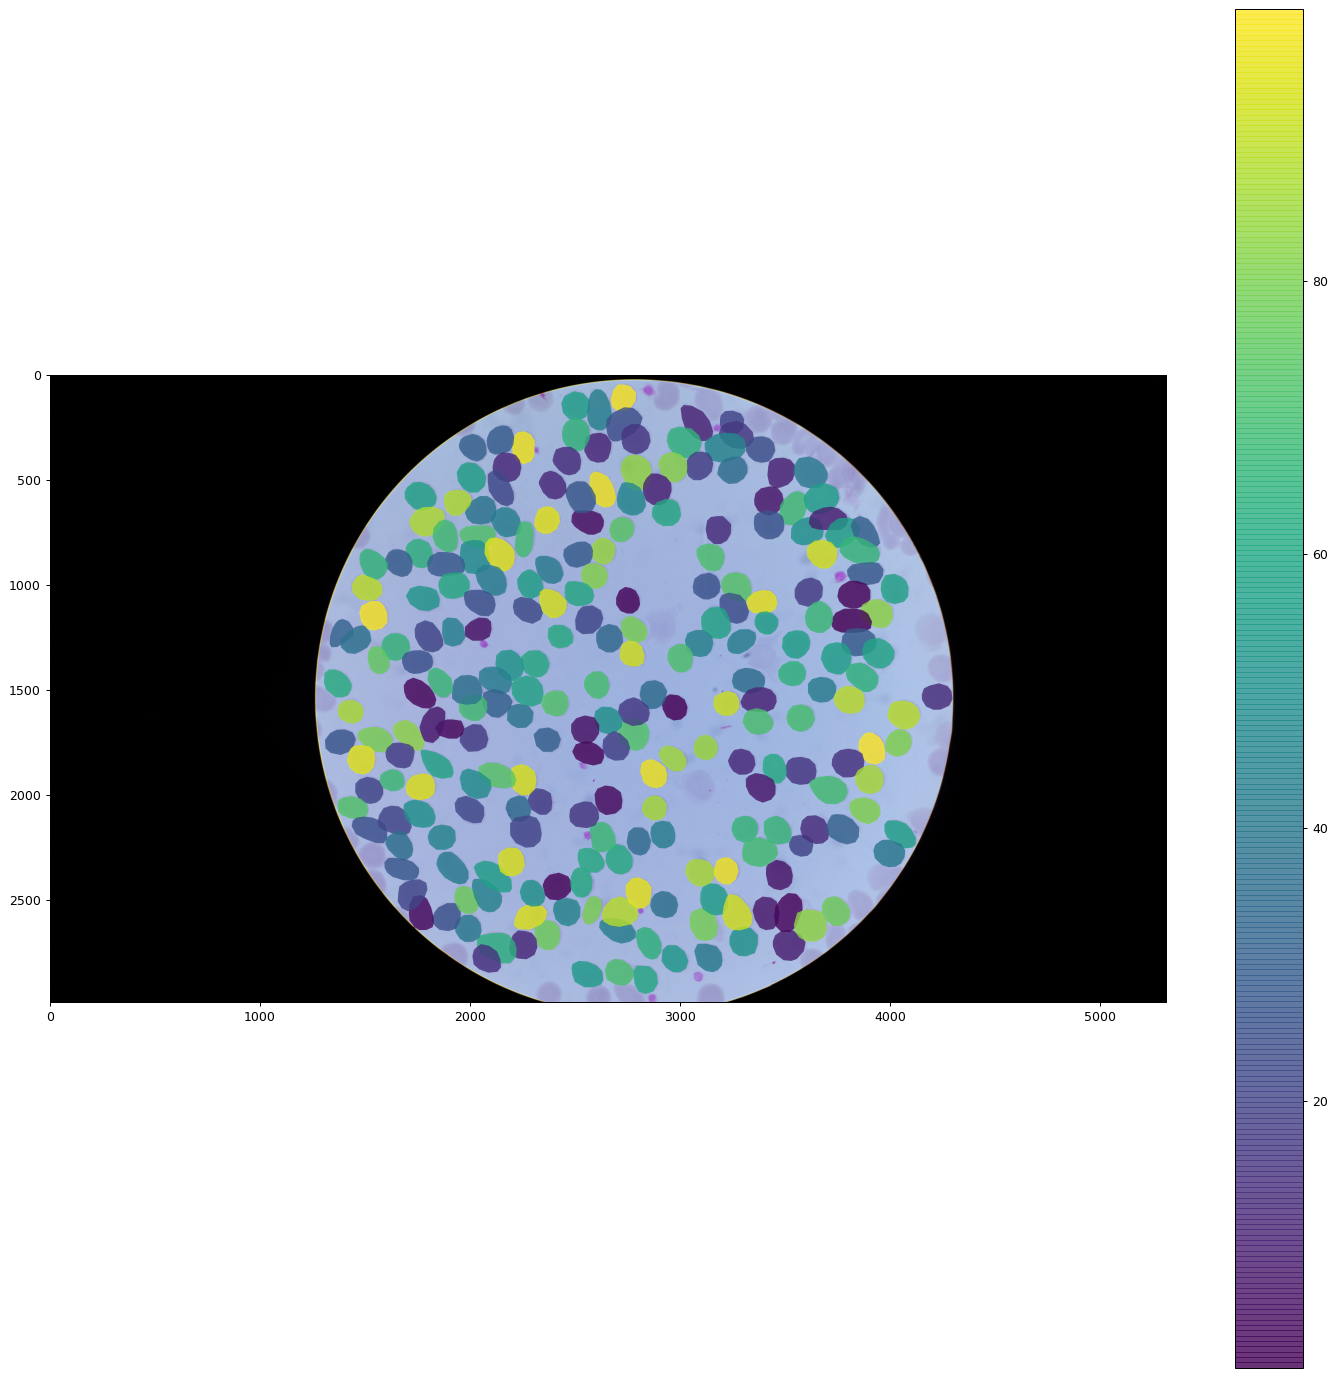

In [509]:
patches = []
patches = [ Polygon(poly) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position'] ]

img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)
empty_img = Image.new("L", [img.shape[1], img.shape[0]], 0)
mask = np.array(empty_img)

fig = plt.figure(1, figsize=(20,20), dpi=90)
ax = fig.add_subplot(111)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.8)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)
plt.imshow(img)

image shape:  <PIL.Image.Image image mode=1 size=5312x2988 at 0x7F0899ECD4E0>


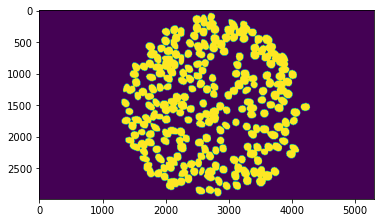

In [510]:
img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)

img = Image.new("L", [img.shape[1], img.shape[0]], 0)
img = img.convert('1')
print('image shape: ', img)
[ ImageDraw.Draw(img).polygon(poly, outline=1, fill=1) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position']]
mask = np.array(img)

plt.imshow(mask)

img.save('Images/polygon_mask.png')

In [511]:
filename =  'IMG_20150621_112043' #'IMG_20150623_134547' 
df_file = df[df['filename'] == filename]
df_file

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  \
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                  ...   
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                            bbx  patient_n_path  
15193  [3575, 1304, 3727, 1432]               3  
15194  [1441, 1202, 1568, 1307]               3  
15195  [2856, 1398, 2960, 1541]               3  
15196  [2982, 1460, 3091, 1578]               3  
15197  [3043, 1651, 3169, 1788]               3  
...                         ...             ...  
15397  [3289, 1194, 3419, 1331]               3  
15398  [3346, 1375, 3496, 1515]               3  
15399  [3259, 1511, 3400, 1647]               3  
15400  [3104, 1532, 3255, 1679]   

## Connected Components

In [512]:
def connected_component_label(img):
    # https://iq.opengenus.org/connected-component-labeling/
    # https://stackoverflow.com/questions/13572448/replace-values-of-a-numpy-index-array-with-values-of-a-list


    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    palette = np.arange(1, 179)
    list_rand_nums = np.random.randint(1,179, 179)
    # list_rand_nums gives the new values you wish palette to be mapped to.
    index = np.digitize(label_hue.ravel(), palette, right=True)
    random_hue = np.uint8(list_rand_nums[index].reshape(label_hue.shape))

    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([random_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(mask)
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGRA2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()

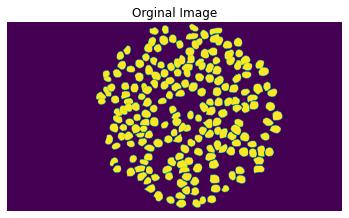

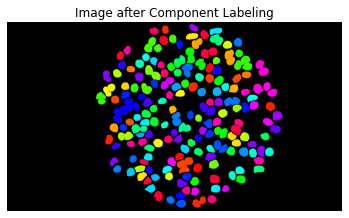

In [513]:
img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)
img = Image.new("L", [img.shape[1], img.shape[0]], 0)
#img = img.convert('1')
[ ImageDraw.Draw(img).polygon(poly, outline=0, fill=1) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position']]
mask = np.array(img)
connected_component_label(mask)

In [514]:
num_labels, labels = cv2.connectedComponents(mask)
print(len(labels[0]))
print(np.max(labels))

5312
175


In [515]:
df

Patient no - Cell no        cell     comment annotation_type  \
0                       3-1  Uninfected  No_comment         Polygon   
1                       3-2  Uninfected  No_comment         Polygon   
2                       3-3  Uninfected  No_comment         Polygon   
3                       3-4  Uninfected  No_comment         Polygon   
4                       3-5  Uninfected  No_comment         Polygon   
...                     ...         ...         ...             ...   
196929                5-200  Uninfected  No_Comment           Point   
196930                5-201  Uninfected  No_Comment           Point   
196931                5-202  Uninfected  No_Comment           Point   
196932                5-203  Uninfected  No_Comment           Point   
196933                5-204  Uninfected  No_Comment           Point   

       Number of points                                           position  \
0                    14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1                    15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2                    14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3                    14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4                    14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   
...                 ...                                                ...   
196929                1                                      [(2080, 643)]   
196930                1                                      [(1790, 606)]   
196931                1                                      [(1757, 756)]   
196932                1                                      [(1860, 856)]   
196933                1                                      [(1623, 683)]   

                   filename  \
0       IMG_20150817_103139   
1       IMG_20150817_103139   
2       IMG_20150817_103139   
3       IMG_20150817_103139   
4       IMG_20150817_103139   
...                     ...   
196929  IMG_20151115_181859   
196930  IMG_20151115_181859   
196931  IMG_20151115_181859   
196932  IMG_20151115_181859   
196933  IMG_20151115_181859   

                                                 txt_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                                 img_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                           bbx  patient_n_path  
0        [2905, 33, 3033, 131]              40  
1       [2951, 141, 3071, 272]              40  
2       [2658, 135, 2801, 276]              40  
3       [2332, 137, 2454, 265]              40  
4       [2499, 140, 2631, 272]              40  
...                        ...             ...  
196929  [2010, 573, 2150, 713]     

# Cutting and tiling images and labels

(2988, 5312)


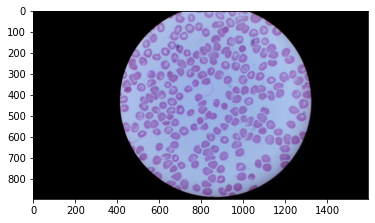

In [516]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
resize_factor = .3
print(img.shape[:2])
resized_img = cv2.resize(img, (int(round(img.shape[1] * resize_factor)), int(round(img.shape[0] * resize_factor))), interpolation=cv2.INTER_AREA)
plt.imshow(resized_img)

In [517]:
df_file

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  \
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                  ...   
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                            bbx  patient_n_path  
15193  [3575, 1304, 3727, 1432]               3  
15194  [1441, 1202, 1568, 1307]               3  
15195  [2856, 1398, 2960, 1541]               3  
15196  [2982, 1460, 3091, 1578]               3  
15197  [3043, 1651, 3169, 1788]               3  
...                         ...             ...  
15397  [3289, 1194, 3419, 1331]               3  
15398  [3346, 1375, 3496, 1515]               3  
15399  [3259, 1511, 3400, 1647]               3  
15400  [3104, 1532, 3255, 1679]   

## Cut fit to circle

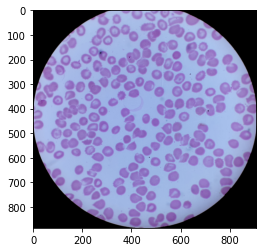

In [518]:
# select circle only
img_gray = rgb2gray(resized_img)
th = threshold_otsu(img_gray)
fg = img_gray>th
# Find the bounding box of those pixels
coords = np.array(np.nonzero(fg))
top_left = np.min(coords, axis=1)
bottom_right = np.max(coords, axis=1)

#set all under threshhold values to zero 
img_circle = resized_img*gray2rgb(fg)

img_cropped = img_circle[top_left[0]:bottom_right[0],
            top_left[1]:bottom_right[1]]

plt.imshow(img_cropped)

In [519]:
def adjust_poly_coord(poly_coords, removed_left, removed_top):
    '''returns a list of polgones with adjusted coordinates'''
    return [(poly[0] - removed_left, poly [1] - removed_top) for poly in poly_coords]
        
def circle_crop(img_path):
    '''returns a cropped image according to the circle as well as the removed top part and removed left part of the image'''
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)

    # select circle only
    img_gray = rgb2gray(img)
    th = threshold_otsu(img_gray)
    fg = img_gray>th
    # Find the bounding box of those pixels
    coords = np.array(np.nonzero(fg))
    min_coords = np.min(coords, axis=1) # [y1, x1]
    max_coords = np.max(coords, axis=1) # [y2, x2]
    
    print('min_coords:', min_coords)
    print('max_coords:', max_coords)
    
    if img_path in dict_poly:
        list_list_tuples_poly = dict_poly[img_path]
        list_tuples_poly = [item for sublist in list_list_tuples_poly for item in sublist]
        list_poly = list(sum(list_tuples_poly, ()))
        x = list_poly[0::2]
        y = list_poly[1::2]
        
        if min(y) < min_coords[0]:
            min_coords[0] = min(y)
        if min(x) < min_coords[1]:
            min_coords[1] = min(x)
        if max(y) > max_coords[0]:
            max_coords[0] = max(y)
        if max(x) > max_coords[1]:
            max_coords[1] = max(x)
            
        print('img_shape: ', img.shape)
        print('new min_coords:', min_coords)
        print('new max_coords:', max_coords)
        print('x min, x max: ', min(x), max(x))
        print('y min, y max: ', min(y), max(y))
    
    #set all under threshhold values to zero 
    img_circle = img*gray2rgb(fg)
    
    ''' image[start_row:end_row, start_column:end_column] e.g. image[30:250, 100:230] or [x1:x2, y1:y2]
    You can see that the waterfall goes vertically starting at about 30px and ending at around 250px.
    You can see that the waterfall goes horizontally from around 100px to around 230px. 
                '''

    img_cropped = img[min_coords[0]:max_coords[0],
                min_coords[1]:max_coords[1]]
    
    return img_cropped, min_coords[0], min_coords[1]

In [520]:
list_list_tuples_poly = dict_poly['../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/221C79P40ThinF/Img/IMG_20150817_103139.jpg']
list_tuples_poly = [item for sublist in list_list_tuples_poly for item in sublist]
list_poly = list(sum(list_tuples_poly, ()))
x = list_poly[0::2]
y = list_poly[1::2]
print('x min, x max: ', min(x), max(x))
print('y min, y max: ', min(y), max(y))

x min, x max:  1398 4332
y min, y max:  33 2952


In [521]:
def adjust_coordinates(img_path, position):
    '''returns adjusted coordinates and fitted circle img path '''
    removed_top, removed_left, outname_im = dict_rmv_fit_to_circle[img_path]
    adjusted_polys = adjust_poly_coord(position, removed_left, removed_top)
    return adjusted_polys


In [522]:
def poly2mask(filename, img_path = 'img_path', out_path = '../data/masks', poly_position = 'position'):
    img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), img_path].iloc[-1], cv2.IMREAD_COLOR)
    img = Image.new("L", [img.shape[1], img.shape[0]], 0)
    img = img.convert('1')
    [ ImageDraw.Draw(img).polygon(poly, outline=0, fill=1) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), poly_position]]

    
    if not os.path.isdir(out_path):
        os.makedirs(out_path)

    mask_path = f'{out_path}/mask_{filename}.png'
    img.save(mask_path)
    return mask_path

def poly2multimask(filename, img_path = 'img_path', out_path = '../data/masks', poly_position = 'adjusted_position', outname_mask = False):
    # fill index number per polygon
    img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), img_path].iloc[-1], cv2.IMREAD_COLOR)
    np_img = np.zeros(shape=[img.shape[0], img.shape[1], 1], dtype=np.uint16)

    # This gets polygons filled with an index number
    for index, poly in enumerate(df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), poly_position]):
        poly = np.array(poly)
        rr, cc = polygon(poly[::,1], poly[::,0])
        np_img[rr, cc] = index
    
    #np_img = np_img.astype(np.uint16) if np_img.max()<2**16-1 else np_img.astype(np.uint32)
        
    if not os.path.isdir(out_path):
        os.makedirs(out_path)    
    
    if outname_mask:
        cv2.imwrite(outname_mask, np_img)
    else:    
        outname_mask = f'{outname_mask}/mask_{filename}.png'
        cv2.imwrite(outname_mask, np_img)
    return outname_mask

In [523]:
check_if_outdir_im_circle = os.path.isdir('../data/fit_to_circle')

if not check_if_outdir_im_circle:
    os.makedirs('../data/fit_to_circle')

In [524]:
 # we want to save all images and also create a dictionary with the pixels removed at the top and bottom
dict_rmv_fit_to_circle = {}
dict_patient_n = dict(zip(df['img_path'], df['patient_n_path']))
dict_filename = dict(zip(df['img_path'], df['filename']))
dict_poly = {}

for img_path in df['img_path'].unique():
    if not df.loc[(df['annotation_type'] == 'Polygon') & (df['img_path'] == img_path), 'img_path'].empty:
        print('poly: ', img_path)
        dict_poly[img_path] = [poly for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['img_path'] == img_path), 'position']]
        
    img_cropped, removed_top, removed_left = circle_crop(img_path)  
    patient_n_path = dict_patient_n[img_path]
    filename = dict_filename[img_path]
    outname_im = os.path.join('../data/fit_to_circle/cropped_P' + str(patient_n_path) + '_' + filename + '.png')
    
    print('saving: ', outname_im)
    cv2.imwrite(outname_im, img_cropped)
    
    dict_rmv_fit_to_circle[img_path] = [removed_top, removed_left, outname_im]
    

poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/221C79P40ThinF/Img/IMG_20150817_103139.jpg
min_coords: [   9 1282]
max_coords: [2987 4352]
img_shape:  (2988, 5312, 3)
new min_coords: [   9 1282]
new max_coords: [2987 4352]
x min, x max:  1398 4332
y min, y max:  33 2952
saving:  ../data/fit_to_circle/cropped_P40_IMG_20150817_103139.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/221C79P40ThinF/Img/IMG_20150817_103303.jpg
min_coords: [  65 1326]
max_coords: [2987 4300]
img_shape:  (2988, 5312, 3)
new min_coords: [  65 1326]
new max_coords: [2987 4300]
x min, x max:  1379 4289
y min, y max:  72 2921
saving:  ../data/fit_to_circle/cropped_P40_IMG_20150817_103303.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/221C79P40ThinF/Img/IMG_20150817_102702.jpg
min_coords: [  43 1313]
max_coords: [2987 4324]
img_shape:  (2988, 5312, 3)
new min_coords: [  43 1313]
new max_coords: [2987 4324]
x min, x max:  1370 4207
y min, y max:  65 2983
saving:  ../data/fit_to_circle/cropped

poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/323C231ThinF/Img/IMG_20151112_152234.jpg
min_coords: [   0 1047]
max_coords: [2987 4443]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1047]
new max_coords: [2987 4443]
x min, x max:  1067 4425
y min, y max:  21 2984
saving:  ../data/fit_to_circle/cropped_P202_IMG_20151112_152234.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/228C86P47ThinF/Img/IMG_20150820_124943.jpg
min_coords: [  25 1261]
max_coords: [2987 4295]
img_shape:  (2988, 5312, 3)
new min_coords: [  25 1261]
new max_coords: [2987 4297]
x min, x max:  1305 4297
y min, y max:  46 2948
saving:  ../data/fit_to_circle/cropped_P47_IMG_20150820_124943.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/228C86P47ThinF/Img/IMG_20150820_125057.jpg
min_coords: [  24 1259]
max_coords: [2987 4296]
img_shape:  (2988, 5312, 3)
new min_coords: [  24 1259]
new max_coords: [2987 4296]
x min, x max:  1273 4249
y min, y max:  62 2980
saving:  ../data/fit_to_circle/cropped_

poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/309C216ThinF/Img/IMG_20151106_135653.jpg
min_coords: [   0 1035]
max_coords: [2987 4375]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1035]
new max_coords: [2987 4375]
x min, x max:  1099 4330
y min, y max:  1 2981
saving:  ../data/fit_to_circle/cropped_P203_IMG_20151106_135653.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/309C216ThinF/Img/IMG_20151106_134733.jpg
min_coords: [   0 1029]
max_coords: [2987 4382]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1029]
new max_coords: [2987 4382]
x min, x max:  1063 4379
y min, y max:  13 2987
saving:  ../data/fit_to_circle/cropped_P203_IMG_20151106_134733.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/343C160P121ThinF/Img/IMG_20151116_093109.jpg
min_coords: [   0 1115]
max_coords: [2987 4264]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1115]
new max_coords: [2987 4264]
x min, x max:  1178 4258
y min, y max:  21 2980
saving:  ../data/fit_to_circle/cropped_

poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/306C213ThinF/Img/IMG_20151106_112853.jpg
min_coords: [   0 1037]
max_coords: [2987 4383]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1037]
new max_coords: [2987 4383]
x min, x max:  1060 4346
y min, y max:  31 2971
saving:  ../data/fit_to_circle/cropped_P204_IMG_20151106_112853.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/306C213ThinF/Img/IMG_20151106_112252.jpg
min_coords: [   0 1005]
max_coords: [2987 4409]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1005]
new max_coords: [2987 4409]
x min, x max:  1011 4393
y min, y max:  1 2986
saving:  ../data/fit_to_circle/cropped_P204_IMG_20151106_112252.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/306C213ThinF/Img/IMG_20151106_112759.jpg
min_coords: [  35 1086]
max_coords: [2987 4346]
img_shape:  (2988, 5312, 3)
new min_coords: [  35 1086]
new max_coords: [2987 4346]
x min, x max:  1154 4290
y min, y max:  99 2948
saving:  ../data/fit_to_circle/cropped_P204

poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/270C122P83ThinF/Img/IMG_20151002_144341.jpg
min_coords: [   0 1277]
max_coords: [2987 4379]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1277]
new max_coords: [2987 4379]
x min, x max:  1334 4295
y min, y max:  10 2972
saving:  ../data/fit_to_circle/cropped_P83_IMG_20151002_144341.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/270C122P83ThinF/Img/IMG_20151002_144855.jpg
min_coords: [   0 1296]
max_coords: [2987 4364]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1296]
new max_coords: [2987 4364]
x min, x max:  1317 4288
y min, y max:  30 2964
saving:  ../data/fit_to_circle/cropped_P83_IMG_20151002_144855.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/270C122P83ThinF/Img/IMG_20151002_145014.jpg
min_coords: [   0 1285]
max_coords: [2987 4378]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1285]
new max_coords: [2987 4378]
x min, x max:  1350 4346
y min, y max:  16 2966
saving:  ../data/fit_to_circle/crop

poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/208C67P28N_ThinF/Img/IMG_20150819_121456.jpg
min_coords: [  32 1036]
max_coords: [2987 4131]
img_shape:  (2988, 5312, 3)
new min_coords: [  32 1036]
new max_coords: [2987 4131]
x min, x max:  1149 4038
y min, y max:  55 2946
saving:  ../data/fit_to_circle/cropped_P28_IMG_20150819_121456.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/208C67P28N_ThinF/Img/IMG_20150819_115417.jpg
min_coords: [  73 1090]
max_coords: [2987 4082]
img_shape:  (2988, 5312, 3)
new min_coords: [  73 1090]
new max_coords: [2987 4082]
x min, x max:  1108 3998
y min, y max:  101 2986
saving:  ../data/fit_to_circle/cropped_P28_IMG_20150819_115417.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/208C67P28N_ThinF/Img/IMG_20150819_121240.jpg
min_coords: [  48 1058]
max_coords: [2987 4113]
img_shape:  (2988, 5312, 3)
new min_coords: [  48 1058]
new max_coords: [2987 4113]
x min, x max:  1176 3987
y min, y max:  53 2983
saving:  ../data/fit_to_circle/

poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/211C70P31_ThinF/Img/IMG_20150813_131022.jpg
min_coords: [  26 1089]
max_coords: [2987 4079]
img_shape:  (2988, 5312, 3)
new min_coords: [  26 1089]
new max_coords: [2987 4079]
x min, x max:  1301 4007
y min, y max:  130 2907
saving:  ../data/fit_to_circle/cropped_P31_IMG_20150813_131022.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/236C94P55ThinF/Img/IMG_20150821_165118.jpg
min_coords: [   0 1230]
max_coords: [2909 4172]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1230]
new max_coords: [2909 4172]
x min, x max:  1231 4145
y min, y max:  1 2895
saving:  ../data/fit_to_circle/cropped_P55_IMG_20150821_165118.png
poly:  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/236C94P55ThinF/Img/IMG_20150821_170403.jpg
min_coords: [   0 1232]
max_coords: [2907 4174]
img_shape:  (2988, 5312, 3)
new min_coords: [   0 1232]
new max_coords: [2907 4174]
x min, x max:  1267 4141
y min, y max:  59 2861
saving:  ../data/fit_to_circle/croppe

min_coords: [   0 1073]
max_coords: [2987 4421]
saving:  ../data/fit_to_circle/cropped_P211_IMG_20151112_144613.png
min_coords: [   0 1289]
max_coords: [2982 4395]
saving:  ../data/fit_to_circle/cropped_P64_IMG_20150918_165125.png
min_coords: [   0 1314]
max_coords: [2949 4337]
saving:  ../data/fit_to_circle/cropped_P64_IMG_20150918_164250.png
min_coords: [   0 1331]
max_coords: [2934 4318]
saving:  ../data/fit_to_circle/cropped_P64_IMG_20150918_164331.png
min_coords: [   0 1321]
max_coords: [2943 4330]
saving:  ../data/fit_to_circle/cropped_P64_IMG_20150918_165016.png
min_coords: [   0 1308]
max_coords: [2959 4361]
saving:  ../data/fit_to_circle/cropped_P64_IMG_20150918_164553.png
min_coords: [  0 998]
max_coords: [2987 4327]
saving:  ../data/fit_to_circle/cropped_P111_IMG_20151115_115805.png
min_coords: [  0 984]
max_coords: [2987 4341]
saving:  ../data/fit_to_circle/cropped_P111_IMG_20151115_115950.png
min_coords: [   0 1026]
max_coords: [2987 4299]
saving:  ../data/fit_to_circle/cr

min_coords: [   0 1072]
max_coords: [2987 4422]
saving:  ../data/fit_to_circle/cropped_P217_IMG_20151112_162940.png
min_coords: [   0 1090]
max_coords: [2987 4410]
saving:  ../data/fit_to_circle/cropped_P217_IMG_20151112_162759.png
min_coords: [   0 1079]
max_coords: [2987 4417]
saving:  ../data/fit_to_circle/cropped_P217_IMG_20151112_162909.png
min_coords: [   0 1110]
max_coords: [2987 4394]
saving:  ../data/fit_to_circle/cropped_P217_IMG_20151112_162843.png
min_coords: [   0 1087]
max_coords: [2987 4411]
saving:  ../data/fit_to_circle/cropped_P217_IMG_20151112_163036.png
min_coords: [   0 1088]
max_coords: [2987 4404]
saving:  ../data/fit_to_circle/cropped_P218_IMG_20151112_113915.png
min_coords: [   0 1087]
max_coords: [2987 4405]
saving:  ../data/fit_to_circle/cropped_P218_IMG_20151112_113953.png
min_coords: [   0 1044]
max_coords: [2987 4439]
saving:  ../data/fit_to_circle/cropped_P218_IMG_20151112_113735.png
min_coords: [   0 1039]
max_coords: [2987 4444]
saving:  ../data/fit_to_

min_coords: [   0 1299]
max_coords: [2987 4365]
saving:  ../data/fit_to_circle/cropped_P97_IMG_20151005_141803.png
min_coords: [   0 1319]
max_coords: [2986 4340]
saving:  ../data/fit_to_circle/cropped_P97_IMG_20151005_140538.png
min_coords: [   0 1295]
max_coords: [2987 4369]
saving:  ../data/fit_to_circle/cropped_P97_IMG_20151005_140646.png
min_coords: [   0 1324]
max_coords: [2985 4352]
saving:  ../data/fit_to_circle/cropped_P97_IMG_20151005_141321.png
min_coords: [   0 1324]
max_coords: [2941 4327]
saving:  ../data/fit_to_circle/cropped_P65_IMG_20150918_170850.png
min_coords: [   0 1328]
max_coords: [2937 4324]
saving:  ../data/fit_to_circle/cropped_P65_IMG_20150918_172214.png
min_coords: [   0 1344]
max_coords: [2923 4304]
saving:  ../data/fit_to_circle/cropped_P65_IMG_20150918_171751.png
min_coords: [   0 1328]
max_coords: [2939 4331]
saving:  ../data/fit_to_circle/cropped_P65_IMG_20150918_172053.png
min_coords: [   0 1300]
max_coords: [2970 4374]
saving:  ../data/fit_to_circle/c

min_coords: [  13 1051]
max_coords: [2987 4096]
saving:  ../data/fit_to_circle/cropped_P20_IMG_20150803_112733.png
min_coords: [   2 1020]
max_coords: [2987 4096]
saving:  ../data/fit_to_circle/cropped_P20_IMG_20150803_112858.png
min_coords: [   1 1022]
max_coords: [2987 4101]
saving:  ../data/fit_to_circle/cropped_P20_IMG_20150803_111333.png
min_coords: [   0 1031]
max_coords: [2987 4388]
saving:  ../data/fit_to_circle/cropped_P225_IMG_20151106_115440.png
min_coords: [   0 1025]
max_coords: [2987 4393]
saving:  ../data/fit_to_circle/cropped_P225_IMG_20151106_114526.png
min_coords: [  0 959]
max_coords: [2987 4446]
saving:  ../data/fit_to_circle/cropped_P225_IMG_20151106_114611.png
min_coords: [  28 1083]
max_coords: [2987 4349]
saving:  ../data/fit_to_circle/cropped_P225_IMG_20151106_114910.png
min_coords: [   0 1063]
max_coords: [2987 4367]
saving:  ../data/fit_to_circle/cropped_P225_IMG_20151106_131748.png
min_coords: [   0 1000]
max_coords: [2987 4408]
saving:  ../data/fit_to_circl

min_coords: [  37 1070]
max_coords: [2987 4074]
saving:  ../data/fit_to_circle/cropped_P71_IMG_20150930_110052.png
min_coords: [  36 1086]
max_coords: [2987 4337]
saving:  ../data/fit_to_circle/cropped_P228_IMG_20151106_154533.png
min_coords: [  41 1089]
max_coords: [2987 4335]
saving:  ../data/fit_to_circle/cropped_P228_IMG_20151106_154510.png
min_coords: [   0 1043]
max_coords: [2987 4374]
saving:  ../data/fit_to_circle/cropped_P228_IMG_20151106_153947.png
min_coords: [   7 1061]
max_coords: [2987 4360]
saving:  ../data/fit_to_circle/cropped_P228_IMG_20151106_154339.png
min_coords: [   7 1062]
max_coords: [2987 4360]
saving:  ../data/fit_to_circle/cropped_P228_IMG_20151106_154016.png
min_coords: [  77 1263]
max_coords: [2987 4219]
saving:  ../data/fit_to_circle/cropped_P52_IMG_20150821_123116.png
min_coords: [  72 1458]
max_coords: [2987 4464]
saving:  ../data/fit_to_circle/cropped_P52_IMG_20150821_124504.png
min_coords: [  78 1263]
max_coords: [2987 4219]
saving:  ../data/fit_to_cir

min_coords: [  73 1096]
max_coords: [2987 4087]
saving:  ../data/fit_to_circle/cropped_P30_IMG_20150819_140143.png
min_coords: [  68 1100]
max_coords: [2987 4095]
saving:  ../data/fit_to_circle/cropped_P30_IMG_20150819_135613.png
min_coords: [  42 1052]
max_coords: [2987 4123]
saving:  ../data/fit_to_circle/cropped_P30_IMG_20150819_135421.png
min_coords: [  67 1094]
max_coords: [2987 4094]
saving:  ../data/fit_to_circle/cropped_P30_IMG_20150819_135705.png
min_coords: [  72 1093]
max_coords: [2987 4088]
saving:  ../data/fit_to_circle/cropped_P30_IMG_20150819_140652.png
min_coords: [   0 1025]
max_coords: [2987 4386]
saving:  ../data/fit_to_circle/cropped_P230_IMG_20151106_133247.png
min_coords: [   0 1013]
max_coords: [2987 4398]
saving:  ../data/fit_to_circle/cropped_P230_IMG_20151106_133012.png
min_coords: [   0 1012]
max_coords: [2987 4398]
saving:  ../data/fit_to_circle/cropped_P230_IMG_20151106_133043.png
min_coords: [  0 980]
max_coords: [2987 4425]
saving:  ../data/fit_to_circle/

min_coords: [   0 1025]
max_coords: [2987 4119]
saving:  ../data/fit_to_circle/cropped_P74_IMG_20150930_134751.png
min_coords: [  29 1057]
max_coords: [2987 4079]
saving:  ../data/fit_to_circle/cropped_P74_IMG_20150930_134355.png
min_coords: [   0 1031]
max_coords: [2987 4109]
saving:  ../data/fit_to_circle/cropped_P74_IMG_20150930_134949.png
min_coords: [  45 1072]
max_coords: [2987 4064]
saving:  ../data/fit_to_circle/cropped_P74_IMG_20150930_134429.png
min_coords: [   0 1552]
max_coords: [2987 4784]
saving:  ../data/fit_to_circle/cropped_P139_IMG_20151201_153246.png
min_coords: [   0 1554]
max_coords: [2987 4777]
saving:  ../data/fit_to_circle/cropped_P139_IMG_20151201_153846.png
min_coords: [   0 1555]
max_coords: [2987 4778]
saving:  ../data/fit_to_circle/cropped_P139_IMG_20151201_151903.png
min_coords: [   0 1555]
max_coords: [2987 4776]
saving:  ../data/fit_to_circle/cropped_P139_IMG_20151201_154337.png
min_coords: [   0 1554]
max_coords: [2987 4786]
saving:  ../data/fit_to_circ

min_coords: [   0 1082]
max_coords: [2987 4410]
saving:  ../data/fit_to_circle/cropped_P236_IMG_20151112_113157.png
min_coords: [   0 1061]
max_coords: [2987 4428]
saving:  ../data/fit_to_circle/cropped_P236_IMG_20151112_111955.png
min_coords: [ 103 1191]
max_coords: [2987 4455]
saving:  ../data/fit_to_circle/cropped_P237_IMG_20151127_115247.png
min_coords: [  69 1157]
max_coords: [2987 4496]
saving:  ../data/fit_to_circle/cropped_P237_IMG_20151127_115545.png
min_coords: [  85 1173]
max_coords: [2987 4477]
saving:  ../data/fit_to_circle/cropped_P237_IMG_20151127_115328.png
min_coords: [  89 1178]
max_coords: [2987 4473]
saving:  ../data/fit_to_circle/cropped_P237_IMG_20151127_115223.png
min_coords: [  89 1176]
max_coords: [2987 4472]
saving:  ../data/fit_to_circle/cropped_P237_IMG_20151127_115306.png
min_coords: [  85 1486]
max_coords: [2987 4496]
saving:  ../data/fit_to_circle/cropped_P53_IMG_20150821_150718.png
min_coords: [ 109 1489]
max_coords: [2987 4453]
saving:  ../data/fit_to_c

min_coords: [   0 1354]
max_coords: [2987 4565]
saving:  ../data/fit_to_circle/cropped_P129_IMG_20151118_153739.png
min_coords: [ 108 1402]
max_coords: [2987 4390]
saving:  ../data/fit_to_circle/cropped_P9_IMG_20150721_161412.png
min_coords: [ 113 1408]
max_coords: [2987 4386]
saving:  ../data/fit_to_circle/cropped_P9_IMG_20150721_161055.png
min_coords: [  89 1390]
max_coords: [2987 4418]
saving:  ../data/fit_to_circle/cropped_P9_IMG_20150721_160944.png
min_coords: [ 108 1403]
max_coords: [2987 4390]
saving:  ../data/fit_to_circle/cropped_P9_IMG_20150721_161243.png
min_coords: [ 107 1452]
max_coords: [2987 4483]
saving:  ../data/fit_to_circle/cropped_P9_IMG_20150721_160406.png
min_coords: [   0 1521]
max_coords: [2987 4815]
saving:  ../data/fit_to_circle/cropped_P137_IMG_20151201_114035.png
min_coords: [   0 1559]
max_coords: [2987 4782]
saving:  ../data/fit_to_circle/cropped_P137_IMG_20151201_120845.png
min_coords: [   0 1560]
max_coords: [2987 4783]
saving:  ../data/fit_to_circle/cro

min_coords: [   0 1310]
max_coords: [2987 4350]
saving:  ../data/fit_to_circle/cropped_P96_IMG_20151005_123857.png
min_coords: [   0 1299]
max_coords: [2987 4363]
saving:  ../data/fit_to_circle/cropped_P96_IMG_20151005_123715.png
min_coords: [   0 1304]
max_coords: [2987 4351]
saving:  ../data/fit_to_circle/cropped_P96_IMG_20151005_124031.png
min_coords: [   0 1313]
max_coords: [2987 4345]
saving:  ../data/fit_to_circle/cropped_P96_IMG_20151005_123441.png
min_coords: [   0 1380]
max_coords: [2987 4568]
saving:  ../data/fit_to_circle/cropped_P133_IMG_20151119_154936.png
min_coords: [   0 1373]
max_coords: [2987 4585]
saving:  ../data/fit_to_circle/cropped_P133_IMG_20151119_155343.png
min_coords: [   0 1378]
max_coords: [2987 4576]
saving:  ../data/fit_to_circle/cropped_P133_IMG_20151119_155156.png
min_coords: [   0 1376]
max_coords: [2987 4577]
saving:  ../data/fit_to_circle/cropped_P133_IMG_20151119_155019.png
min_coords: [   0 1381]
max_coords: [2987 4569]
saving:  ../data/fit_to_circ

min_coords: [   0 1322]
max_coords: [2978 4328]
saving:  ../data/fit_to_circle/cropped_P79_IMG_20151002_104831.png
min_coords: [   1 1334]
max_coords: [2976 4319]
saving:  ../data/fit_to_circle/cropped_P79_IMG_20151002_105018.png
min_coords: [   0 1315]
max_coords: [2987 4336]
saving:  ../data/fit_to_circle/cropped_P84_IMG_20151002_151851.png
min_coords: [   0 1304]
max_coords: [2987 4354]
saving:  ../data/fit_to_circle/cropped_P84_IMG_20151002_152144.png
min_coords: [   0 1319]
max_coords: [2986 4333]
saving:  ../data/fit_to_circle/cropped_P84_IMG_20151002_150931.png
min_coords: [   0 1315]
max_coords: [2987 4341]
saving:  ../data/fit_to_circle/cropped_P84_IMG_20151002_151143.png
min_coords: [   0 1315]
max_coords: [2987 4341]
saving:  ../data/fit_to_circle/cropped_P84_IMG_20151002_151432.png
min_coords: [   0 1313]
max_coords: [2987 4339]
saving:  ../data/fit_to_circle/cropped_P91_IMG_20151004_135449.png
min_coords: [   0 1315]
max_coords: [2987 4349]
saving:  ../data/fit_to_circle/c

min_coords: [   0 1102]
max_coords: [2987 4289]
saving:  ../data/fit_to_circle/cropped_P119_IMG_20151115_181436.png
min_coords: [   0 1093]
max_coords: [2987 4299]
saving:  ../data/fit_to_circle/cropped_P119_IMG_20151115_181558.png
min_coords: [   0 1080]
max_coords: [2987 4312]
saving:  ../data/fit_to_circle/cropped_P119_IMG_20151115_181136.png
min_coords: [   0 1067]
max_coords: [2987 4332]
saving:  ../data/fit_to_circle/cropped_P119_IMG_20151115_181035.png
min_coords: [   0 1071]
max_coords: [2987 4329]
saving:  ../data/fit_to_circle/cropped_P119_IMG_20151115_181859.png


In [525]:
df['adjusted_position'] = df.apply(lambda row: adjust_coordinates(row.img_path, row.position), axis = 1) 
df['img_path_fit2circle'] = df['img_path'].apply(lambda x: dict_rmv_fit_to_circle[x][2])

In [526]:
# creating masks for Polygon set
dict_mask = {}

for img_path in df.loc[(df['annotation_type'] == 'Polygon'), 'img_path'].unique():
    patient_n_path = dict_patient_n[img_path]
    filename = dict_filename[img_path]
    outname_mask = os.path.join('../data/fit_to_circle/masks_cropped_P' + str(patient_n_path) + '_' + filename + '_masks''.png')
    
    print('saving: ', outname_mask)
    outname_mask = poly2multimask(filename, 'img_path_fit2circle',  out_path = '../data/masks_fit2cricle', poly_position = 'adjusted_position', outname_mask = outname_mask)
    
    dict_mask[img_path] = outname_mask

saving:  ../data/fit_to_circle/masks_cropped_P40_IMG_20150817_103139_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P40_IMG_20150817_103303_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P40_IMG_20150817_102702_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P40_IMG_20150817_102823_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P40_IMG_20150817_103901_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P13_IMG_20150725_123938_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P13_IMG_20150725_125213_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P13_IMG_20150725_125847_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P13_IMG_20150725_124606_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P13_IMG_20150725_124830_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P89_IMG_20151004_130810_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P89_IMG_20151004_130408_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P89_IMG

saving:  ../data/fit_to_circle/masks_cropped_P207_IMG_20151112_131731_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P95_IMG_20151005_121656_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P95_IMG_20151005_121425_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P95_IMG_20151005_121554_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P95_IMG_20151005_121343_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P95_IMG_20151005_121048_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P29_IMG_20150819_133447_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P29_IMG_20150819_134326_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P29_IMG_20150819_133236_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P29_IMG_20150819_133350_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P29_IMG_20150819_134112_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P76_IMG_20150930_162315_masks.png
saving:  ../data/fit_to_circle/masks_cropped_P76_IM

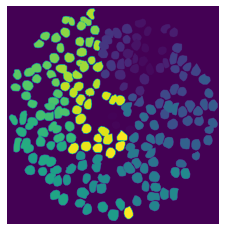

In [527]:
filename = 'IMG_20150621_112043'
img_path = 'img_path_fit2circle'
img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), img_path].iloc[-1], cv2.IMREAD_COLOR)
img = np.zeros(shape=[img.shape[1], img.shape[0], 1], dtype=np.uint8)

for index, poly in enumerate(df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'adjusted_position']):
    poly = np.array(poly)
    rr, cc = polygon(poly[::,0], poly[::,1])
    img[rr, cc] = index
    
plt.imshow(img)
plt.axis('off')
plt.show()

In [528]:
df.loc[(df['annotation_type'] == 'Polygon'), 'mask_path_fit2circle'] = df.loc[(df['annotation_type'] == 'Polygon'), 'img_path'].apply(lambda x: dict_mask[x])
df.head()

Patient no - Cell no        cell     comment annotation_type  \
0                  3-1  Uninfected  No_comment         Polygon   
1                  3-2  Uninfected  No_comment         Polygon   
2                  3-3  Uninfected  No_comment         Polygon   
3                  3-4  Uninfected  No_comment         Polygon   
4                  3-5  Uninfected  No_comment         Polygon   

  Number of points                                           position  \
0               14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1               15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2               14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3               14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4               14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   

              filename                                           txt_path  \
0  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                            img_path                     bbx  \
0  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   [2905, 33, 3033, 131]   
1  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2951, 141, 3071, 272]   
2  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2658, 135, 2801, 276]   
3  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2332, 137, 2454, 265]   
4  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2499, 140, 2631, 272]   

   patient_n_path                                  adjusted_position  \
0              40  [(1652, 29), (1673, 24), (1710, 26), (1733, 35...   
1              40  [(1731, 132), (1711, 135), (1690, 148), (1674,...   
2              40  [(1448, 126), (1422, 135), (1390, 156), (1379,...   
3              40  [(1097, 128), (1071, 140), (1052, 160), (1050,...   
4              40  [(1293, 131), (1266, 136), (1240, 152), (1218,...   

                                 img_path_fit2circle  \
0  ../data/fit_to_circle/cropped_P40_IMG_20150817...   
1  ../data/fit_to_circle/cropped_P40_IMG_20150817...   
2  ../data/fit_to_circle/cropped_P40_IMG_20150817...   
3  ../data/fit_to_circle/cropped_P40_IMG_20150817...   
4  ../data/fit_to_circle/cropped_P40_IMG_20150817...   

                                mask_path_fit2circle  
0  ../data/fit_to_circle/masks_cropped_P40_IMG_20...  
1  ../data/fit_to_circle/masks_cropped_P40_IMG_20...  
2  ../data/fit_to_circle/masks_cropped_P40_IMG_20...  
3  ../data/fit_to_circle/masks_cropped_P40_IMG_20...  
4  ../data/fit_to_circle/masks_cropped_P40_IMG_20...

In [529]:
filename =  'IMG_20150621_112043' #'IMG_20150623_134547' 
df_file = df[df['filename'] == filename]
df_file.head()

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  \
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                            bbx  patient_n_path  \
15193  [3575, 1304, 3727, 1432]               3   
15194  [1441, 1202, 1568, 1307]               3   
15195  [2856, 1398, 2960, 1541]               3   
15196  [2982, 1460, 3091, 1578]               3   
15197  [3043, 1651, 3169, 1788]               3   

                                       adjusted_position  \
15193  [(2245, 1426), (2224, 1407), (2203, 1398), (21...   
15194  [(67, 1284), (94, 1301), (119, 1307), (163, 12...   
15195  [(1537, 1541), (1572, 1517), (1581, 1491), (15...   
15196  [(1628, 1569), (1608, 1551), (1603, 1516), (16...   
15197  [(1725, 1788), (1749, 1782), (1787, 1720), (17...   

                                     img_path_fit2circle  \
15193  ../data/fit_to_circle/cropped_P3_IMG_20150621_...   
15194  ../data/fit_to_circle/cropped_P3_IMG_20150621_...   
15195  ../data/fit_to_circle/cropped_P3_IMG_20150621_...   
15196  ../data/fit_to_circle/cropped_P3_IMG_20150621_...   
15197  ../data/fit_to_circle/cropped_P3_IMG_20150621_...   

                                    mask_path_fit2circle  
15193  ../data/fit_to_circle/masks_cropped_P3_IMG_201...  
15194  ../data/fit_to_circle/masks_cropped_P3_IMG_201...  
15195  ../data/fit_to_circle/masks_cropped_P3_IMG_201...  
15196  ../data/fit_to_circle/masks_cropped_P3_IMG_201...  
15197  ../data/fit_to_circle/masks_cropped_P3_IMG_201...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


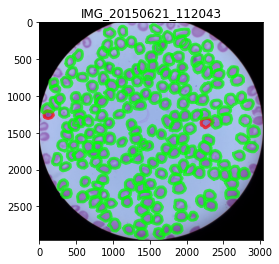

In [530]:
img = cv2.imread(df_file['img_path_fit2circle'].iloc[-1], cv2.IMREAD_COLOR)
plt.imshow(img)
fig = plt.figure(1, figsize=(20,20), dpi=90)
df_file.apply(lambda row: draw_points(img, row['cell'], row['annotation_type'], row['adjusted_position'], row), axis = 1)
plt.imshow(img)

In [531]:
def get_bbx(position, annotation_type, bb_pixel):
    if annotation_type == 'Polygon':
        poly_list = np.array([list(ele) for ele in position])
        x_min = np.nanmin(poly_list[:, 0])
        x_max = np.nanmax(poly_list[:, 0])
        y_min = np.nanmin(poly_list[:, 1])
        y_max = np.nanmax(poly_list[:, 1])
        return [x_min, y_min, x_max, y_max]
    if annotation_type == 'Point':
        point_list = np.array(position)
        x_min = int(point_list[:, 0] - 0.5 * bb_pixel)
        x_max = int(point_list[:, 0] + 0.5 * bb_pixel)
        y_min = int(point_list[:, 1] - 0.5 * bb_pixel)
        y_max = int(point_list[:, 1] + 0.5 * bb_pixel)
        return [x_min, y_min, x_max, y_max]

In [532]:
df['adjusted_bbx'] = df.apply(lambda row: get_bbx(row['adjusted_position'], row['annotation_type'], 150), axis = 1)

In [533]:
filename =  'IMG_20150623_134547' 
df_file = df[df['filename'] == filename]
df_file.head()

Patient no - Cell no         cell     comment annotation_type  \
149122                  2-1  Parasitized  No_Comment           Point   
149123                  2-2   Uninfected  No_Comment           Point   
149124                  2-3   Uninfected  No_Comment           Point   
149125                  2-4   Uninfected  No_Comment           Point   
149126                  2-5   Uninfected  No_Comment           Point   

       Number of points        position             filename  \
149122                1  [(1131, 1205)]  IMG_20150623_134547   
149123                1  [(3804, 1277)]  IMG_20150623_134547   
149124                1  [(1898, 1277)]  IMG_20150623_134547   
149125                1  [(1818, 1350)]  IMG_20150623_134547   
149126                1  [(1828, 1481)]  IMG_20150623_134547   

                                                 txt_path  \
149122  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149123  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149124  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149125  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149126  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   

                                                 img_path  \
149122  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149123  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149124  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149125  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149126  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   

                             bbx  patient_n_path adjusted_position  \
149122  [1061, 1135, 1201, 1275]               5     [(131, 1171)]   
149123  [3734, 1207, 3874, 1347]               5    [(2804, 1243)]   
149124  [1828, 1207, 1968, 1347]               5     [(898, 1243)]   
149125  [1748, 1280, 1888, 1420]               5     [(818, 1316)]   
149126  [1758, 1411, 1898, 1551]               5     [(828, 1447)]   

                                      img_path_fit2circle  \
149122  ../data/fit_to_circle/cropped_P5_IMG_20150623_...   
149123  ../data/fit_to_circle/cropped_P5_IMG_20150623_...   
149124  ../data/fit_to_circle/cropped_P5_IMG_20150623_...   
149125  ../data/fit_to_circle/cropped_P5_IMG_20150623_...   
149126  ../data/fit_to_circle/cropped_P5_IMG_20150623_...   

       mask_path_fit2circle              adjusted_bbx  
149122                  NaN     [56, 1096, 206, 1246]  
149123                  NaN  [2729, 1168, 2879, 1318]  
149124                  NaN    [823, 1168, 973, 1318]  
149125                  NaN    [743, 1241, 893, 1391]  
149126                  NaN    [753, 1372, 903, 1522]

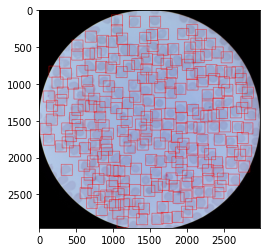

In [534]:
img = cv2.imread(df_file['img_path_fit2circle'].iloc[-1], cv2.IMREAD_COLOR)
img_with_box = bbv.draw_multiple_rectangles(img, df_file['adjusted_bbx'].tolist(), bbox_color = (255, 0, 0), thickness=3)
plt.imshow(img_with_box)

## Crop tiles

In [535]:
def plot_tiles(img, tile_w, tile_h):
    img_shape = img.shape
    tile_size = (tile_w, tile_h)
    offset = (tile_w, tile_h)

    for x in range(int(math.ceil(img_shape[0]/(offset[1] * 1.0)))):
        #print(i)
        for y in range(int(math.ceil(img_shape[1]/(offset[0] * 1.0)))):
            #print(j)
            #print((offset[1]*i, min(offset[1]*i+tile_size[1], img_shape[0])), (offset[0]*j, min(offset[0]*j+tile_size[0], img_shape[1])))
            x_min = min(offset[1] * x + tile_size[1], img_shape[0])
            x_max = offset[1] * x
            y_min = min(offset[0] * y + tile_size[0], img_shape[1])
            y_max = offset[0]*y
            cv2.rectangle(img, (x_max, x_min), (y_max, y_min), (0, 0, 255), 3)
            #cropped_img = img[offset[1]*i:min(offset[1]*i+tile_size[1], img_shape[0]), offset[0]*j:min(offset[0]*j+tile_size[0], img_shape[1])]
            # Debugging the tiles
            #cv2.imwrite("debug_" + str(i) + "_" + str(j) + ".png", cropped_img)
    plt.imshow(crop_img)

def crop_tiles(img, tile_w, tile_h):
    img_shape = img.shape
    tile_size = (tile_w, tile_h)
    offset = (tile_w, tile_h)
    for x in range(int(math.ceil(img_shape[0]/(offset[1] * 1.0)))):
        for y in range(int(math.ceil(img_shape[1]/(offset[0] * 1.0)))):
            x_min = offset[1] * x
            x_max = min(offset[1] * x + tile_size[1], img_shape[0])
            y_min = offset[0]*y
            y_max = min(offset[0] * y + tile_size[0], img_shape[1])
            crop_image = img[x_min : x_min + tile_w, y_min: y_min + tile_h]
            cv2.imwrite(f'../cropped/{x_min}_{x_max}_{y_min}_{y_max}.png', crop_image) 
    #plt.imshow(crop_image)


In [536]:
crop_tiles(img_cropped, 256, 256)

In [537]:
def convert_labels(path, x1, y1, x2, y2):
    """
    Definition: Parses label files to extract label and bounding box
        coordinates.  Converts (x1, y1, x1, y2) KITTI format to
        (x, y, width, height) normalized YOLO format.
    """
    def sorting(l1, l2):
        if l1 > l2:
            lmax, lmin = l1, l2
            return lmax, lmin
        else:
            lmax, lmin = l2, l1
            return lmax, lmin
    size = get_img_shape(path)
    xmax, xmin = sorting(x1, x2)
    ymax, ymin = sorting(y1, y2)
    dw = 1./size[1]
    dh = 1./size[0]
    x = (xmin + xmax)/2.0
    y = (ymin + ymax)/2.0
    w = xmax - xmin
    h = ymax - ymin
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

In [538]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : list
        order: [x1, y1, x2, y2] 
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : list
        order: [x1, y1, x2, y2]
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]
    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [539]:
def get_intersection_percent(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : list
        order: [x1, y1, x2, y2] 
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : list
        order: [x1, y1, x2, y2]
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]
    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [540]:
get_intersection_percent( [0, 0, 10, 10], [0, 0, 20, 20])

1.0

In [541]:
###############################################################################
def slice_img(input_im, input_mask, 
                     filename,
                    outdir_im, 
                     outdir_mask,
                     outdir_label,
                      classes_dic, 
                     category, 
                     box_coords, resize_factor = 1,
                  sliceHeight=256, sliceWidth=256,
                  zero_frac_thresh=0, overlap=0, pad=0, verbose = False,
                  box_coords_dir='', yolt_coords_dir='', create_mask = False):
    '''
    ADAPTED FROM YOLT/SCRIPTS/SLICE_IM.PY
    Assume input_im is rgb
    Slice large image into smaller pieces,
    ignore slices with a percentage null greater then zero_fract_thresh'''
    
    if verbose == True:
        print('############# slice_img #############')
    img = cv2.imread(input_im, 1)  # color
    if create_mask:
        mask = cv2.imread(input_mask, 0)
    category_num = [classes_dic[k] for k in category] 

    resized_img = cv2.resize(img, (int(round(img.shape[1] * resize_factor)), int(round(img.shape[0] * resize_factor))))
    if create_mask == True:
        resized_mask = cv2.resize(mask, (int(round(mask.shape[1] * resize_factor)), int(round(mask.shape[0] * resize_factor))))
    resized_box_coords = np.array(np.round(np.array(box_coords) * np.array(resize_factor)).astype(int))


    im_h, im_w = resized_img.shape[:2]
    if verbose:
        print('im_h', im_h)
        print('im_w', im_w)

    win_size = sliceHeight*sliceWidth

    # if slice sizes are large than image, pad the edges
    if sliceHeight > im_h:
        pad = sliceHeight - im_h
    if sliceWidth > im_w:
        pad = max(pad, sliceWidth - im_w)
    # pad the edge of the image with black pixels
    if pad > 0:
        border_color = (0, 0, 0)
        resized_img = cv2.copyMakeBorder(resized_img, pad, pad, pad, pad,
                                   cv2.BORDER_CONSTANT, value=border_color)
        if create_mask == True:
            resized_mask = cv2.copyMakeBorder(resized_img, pad, pad, pad, pad,
                                cv2.BORDER_CONSTANT, value=border_color)

    t0 = time.time()
    n_ims = 0
    n_ims_nonull = 0
    dx = int((1. - overlap) * sliceWidth)
    dy = int((1. - overlap) * sliceHeight)
    if verbose:
        print('dx', dx)
        print('dy', dy)
    dict_yolo = {}
    dict_bbx = {}
    max_annot = 0

    for y in range(0, im_h, dy):  # sliceHeight:
        for x in range(0, im_w, dx):  # sliceWidth:
            n_ims += 1
            # extract image
            # make sure we don't go past the edge of the image
            if y + sliceHeight > im_h:
                y0 = im_h - sliceHeight
            else:
                y0 = y
            if x + sliceWidth > im_w:
                x0 = im_w - sliceWidth
            else:
                x0 = x

            window_c = resized_img[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
            if create_mask == True:
                window_mask = resized_mask[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
##           gt_c = gt_image[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
#             gt_c = image[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
            win_h, win_w = window_c.shape[:2]
    
            outname_part = 'slice_' + filename + \
            '_' + str(y0) + '_' + str(x0) + \
            '_' + str(win_h) + '_' + str(win_w) + \
            '_' + str(pad)

            if create_mask == True:
                outname_mask_part = 'slice_mask_' + filename + \
                    '_' + str(y0) + '_' + str(x0) + \
                    '_' + str(win_h) + '_' + str(win_w) + \
                    '_' + str(pad)
        

            # get black and white image
            window = cv2.cvtColor(window_c, cv2.COLOR_BGR2GRAY)

            # find threshold of image that's not black
            # https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html?highlight=threshold
            ret, thresh1 = cv2.threshold(window, 2, 255, cv2.THRESH_BINARY)
            non_zero_counts = cv2.countNonZero(thresh1)
            zero_counts = win_size - non_zero_counts
            zero_frac = float(zero_counts) / win_size
            # skip if image is mostly empty
            if zero_frac >= zero_frac_thresh:
                if verbose:
                    print("Zero frac too high at:", zero_frac)
                continue
                
            new_box_coords = []
            yolt_coords = []
            annot_count = 0

            for box, cat in zip(resized_box_coords, category_num):
                cut_box = 0
                percent_in_cut_img = get_intersection_percent(box, [x0, y0, x0 + sliceWidth, y0 + sliceHeight])

                if percent_in_cut_img > 0.75:   
                    resized_box_cat = np.asarray([box[0] - x0, box[1] - y0, box[2] - x0, box[3] - y0, cat])
                    new_box_coords.append(resized_box_cat)
                    annot_count += 1
                    # Input to convert: image size: (w,h), box: [x0, x1, y0, y1]
                    #print(box)
                    yolt_co_i = convert((win_w, win_h), box)
                    yolt_coords.append(yolt_co_i)

                    
            if annot_count > max_annot:
                max_annot = annot_count

            #  save
            outname_im = os.path.join(outdir_im, outname_part + '.png')
            if create_mask == True:
                outname_mask = os.path.join(outdir_mask, outname_mask_part + '.png')
            txt_outpath = os.path.join(outdir_label, outname_part + '.txt')

            dict_yolo[outname_im] = yolt_coords
            dict_bbx[outname_im] = new_box_coords
          

            # save yolt ims
            if verbose:
                print("image output:", outname_im)
            cv2.imwrite(outname_im, window_c)
            if create_mask == True:
                cv2.imwrite(outname_mask, window_mask)

            # save yolt labels
            txt_outfile = open(txt_outpath, "w+")
            if verbose:
                print("txt output:" + txt_outpath)
            for bb in yolt_coords:
                outstring = str(category_num) + " " + \
                    " ".join([str(a) for a in bb]) + '\n'
                if verbose:
                    print("outstring:", outstring)
                txt_outfile.write(outstring)
            txt_outfile.close()

            # if desired, save coords files
            # save box coords dictionary so that yolt_eval.py can read it
            if len(box_coords_dir) > 0:
                coords_dic = gt_dic_from_box_coords(box_coords)
                outname_pkl = os.path.join(
                    box_coords_dir, outname_part + '_' + category + '.pkl')
                pickle.dump(coords_dic, open(outname_pkl, 'wb'), protocol=2)
            if len(yolt_coords_dir) > 0:
                outname_pkl = os.path.join(
                    yolt_coords_dir, outname_part + '_' + category + '.pkl')
                pickle.dump(yolt_coords, open(outname_pkl, 'wb'), protocol=2)

            n_ims_nonull += 1

    if verbose:
        print("Num slices:", n_ims, "Num non-null slices:", n_ims_nonull,
              "sliceHeight", sliceHeight, "sliceWidth", sliceWidth)
        print("Time to slice", input_im, time.time()-t0, "seconds")

    return dict_yolo, dict_bbx, max_annot

def convert(size, box):
    '''Input = image size: (w,h), box: [x0, x1, y0, y1]'''
    dw = 1./size[0]
    dh = 1./size[1]
    xmid = (box[0] + box[1])/2.0
    ymid = (box[2] + box[3])/2.0
    w0 = box[1] - box[0]
    h0 = box[3] - box[2]
    x = xmid*dw
    y = ymid*dh
    w = w0*dw
    h = h0*dh
    return (x, y, w, h)

In [542]:
def cut_images(df,
                slice_height = 256,
                slice_width = 256,
                resize_factor = 0.3,
                classes_dic = {'Uninfected': 0, 'Parasitized': 1, 'White_Blood_Cell': 2},
                zero_frac_thresh = 0.9, 
                overlap = 0, 
                pad = 0,
                verbose=False):
    
    
    dict_mask = {}
    dict_bbxs = {}
    total_max_annot = 0
    mask_path = ''
    outdir_mask = ''

    for filename in df['filename'].unique():
        create_mask = False
        if df.loc[(df['filename'] == filename),'annotation_type'].iloc[-1] ==  'Polygon':
            # first we create a black and white mask where the polygons are white
            mask_path = poly2mask(filename)
            dict_mask[filename] = mask_path
            # now lets slice the images (and bbx although we will proabaly not use them)
            filename = df.loc[(df['filename'] == filename),'filename'].iloc[-1]
            img_path = df.loc[(df['filename'] == filename),'img_path'].iloc[-1]

            if not os.path.isdir('../data/cropped'):
                os.makedirs('../data/cropped')

            outdir_im = f'../data/cropped/{filename}/img'
            outdir_mask = f'../data/cropped/{filename}/mask'
            outdir_label = f'../data/cropped/{filename}/labels'
            check_if_outdir_im = os.path.isdir(outdir_im)
            check_if_outdir_mask = os.path.isdir(outdir_mask)
            check_if_outdir_label = os.path.isdir(outdir_label)

            if not check_if_outdir_im:
                os.makedirs(outdir_im)
            if not check_if_outdir_mask:
                os.makedirs(outdir_mask)
            if not check_if_outdir_label:
                os.makedirs(outdir_label)
            create_mask = True

        else: 
            # now lets slice the images (and bbx although we will proabaly not use them)
            filename = df.loc[(df['filename'] == filename),'filename'].iloc[-1]
            img_path = df.loc[(df['filename'] == filename),'img_path'].iloc[-1]

            if not os.path.isdir('../data/cropped'):
                os.makedirs('../data/cropped')

            outdir_im = f'../data/cropped/{filename}/img'
            outdir_label = f'../data/cropped/{filename}/labels'
            check_if_outdir_im = os.path.isdir(outdir_im)
            check_if_outdir_label = os.path.isdir(outdir_label)

            if not check_if_outdir_im:
                os.makedirs(outdir_im)
            if not check_if_outdir_label:
                os.makedirs(outdir_label)


        box_coords = df.loc[(df['filename'] == filename),'bbx'].tolist()
        category = df.loc[(df['filename'] == filename),'cell'].tolist()

        dict_yolo, dict_bbx, \
            max_annot = slice_img(img_path, mask_path, 
                                filename,
                                outdir_im, 
                                outdir_mask, 
                                outdir_label,
                                classes_dic, 
                                category, 
                                box_coords, 
                            sliceHeight= slice_height, sliceWidth=slice_width,
                            resize_factor = resize_factor,
                            zero_frac_thresh = zero_frac_thresh, overlap = overlap, pad = pad, verbose=False,
                            box_coords_dir='', yolt_coords_dir='', create_mask = create_mask)

        if max_annot > total_max_annot:
            total_max_annot = max_annot
            
        dict_bbxs.update(dict_bbx)
            
        print('filename: ', filename, ', len dict_bbx: ', len(dict_bbxs))

    return dict_yolo, dict_bbxs, dict_mask, total_max_annot

In [543]:
#df_para = df.loc[(df['cell'] == 'Parasitized')].reset_index(drop=True)
df_para = df

In [544]:
df.loc[(df['cell'] == 'Parasitized') & (df['filename'] == 'IMG_20151116_110921')]

Patient no - Cell no         cell     comment annotation_type  \
143669                  2-1  Parasitized  No_Comment           Point   
143780                2-112  Parasitized  No_Comment           Point   

       Number of points        position             filename  \
143669                1  [(3338, 2542)]  IMG_20151116_110921   
143780                1  [(2416, 2038)]  IMG_20151116_110921   

                                                 txt_path  \
143669  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
143780  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                                 img_path  \
143669  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
143780  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                             bbx  patient_n_path adjusted_position  \
143669  [3268, 2472, 3408, 2612]             124    [(1991, 2542)]   
143780  [2346, 1968, 2486, 2108]             124    [(1069, 2038)]   

                                      img_path_fit2circle  \
143669  ../data/fit_to_circle/cropped_P124_IMG_2015111...   
143780  ../data/fit_to_circle/cropped_P124_IMG_2015111...   

       mask_path_fit2circle              adjusted_bbx  
143669                  NaN  [1916, 2467, 2066, 2617]  
143780                  NaN   [994, 1963, 1144, 2113]

In [545]:
#dict_yolo, dict_bbxs, dict_mask, total_max_annot = cut_images(df_para, classes_dic = {'Parasitized': 1})
dict_yolo, dict_bbxs, dict_mask, total_max_annot = cut_images(df)

filename:  IMG_20150817_103139 , len dict_bbx:  15
filename:  IMG_20150817_103303 , len dict_bbx:  29
filename:  IMG_20150817_102702 , len dict_bbx:  43
filename:  IMG_20150817_102823 , len dict_bbx:  58
filename:  IMG_20150817_103901 , len dict_bbx:  73
filename:  IMG_20150725_123938 , len dict_bbx:  89
filename:  IMG_20150725_125213 , len dict_bbx:  105
filename:  IMG_20150725_125847 , len dict_bbx:  121
filename:  IMG_20150725_124606 , len dict_bbx:  137
filename:  IMG_20150725_124830 , len dict_bbx:  153
filename:  IMG_20151004_130810 , len dict_bbx:  167
filename:  IMG_20151004_130408 , len dict_bbx:  181
filename:  IMG_20151004_130549 , len dict_bbx:  195
filename:  IMG_20151004_131030 , len dict_bbx:  209
filename:  IMG_20151004_131129 , len dict_bbx:  223
filename:  IMG_20151029_162934 , len dict_bbx:  240
filename:  IMG_20151029_162357 , len dict_bbx:  257
filename:  IMG_20151029_162605 , len dict_bbx:  274
filename:  IMG_20151029_162439 , len dict_bbx:  291
filename:  IMG_201

filename:  IMG_20150813_163120 , len dict_bbx:  2491
filename:  IMG_20150813_161634 , len dict_bbx:  2506
filename:  IMG_20150813_162554 , len dict_bbx:  2521
filename:  IMG_20150813_162146 , len dict_bbx:  2536
filename:  IMG_20151119_143039 , len dict_bbx:  2553
filename:  IMG_20151118_163539 , len dict_bbx:  2569
filename:  IMG_20151119_143212 , len dict_bbx:  2585
filename:  IMG_20151118_172913 , len dict_bbx:  2601
filename:  IMG_20151118_173039 , len dict_bbx:  2619
filename:  IMG_20151115_151211 , len dict_bbx:  2635
filename:  IMG_20151115_150057 , len dict_bbx:  2652
filename:  IMG_20151115_151015 , len dict_bbx:  2668
filename:  IMG_20151115_150925 , len dict_bbx:  2684
filename:  IMG_20151115_150728 , len dict_bbx:  2700
filename:  IMG_20151112_144652 , len dict_bbx:  2717
filename:  IMG_20151112_144147 , len dict_bbx:  2733
filename:  IMG_20151112_144222 , len dict_bbx:  2750
filename:  IMG_20151112_144534 , len dict_bbx:  2767
filename:  IMG_20151112_144613 , len dict_bbx:

filename:  IMG_20151002_133540 , len dict_bbx:  5024
filename:  IMG_20151002_133427 , len dict_bbx:  5038
filename:  IMG_20151002_133158 , len dict_bbx:  5052
filename:  IMG_20151002_132926 , len dict_bbx:  5066
filename:  IMG_20151005_141946 , len dict_bbx:  5080
filename:  IMG_20151005_141803 , len dict_bbx:  5094
filename:  IMG_20151005_140538 , len dict_bbx:  5108
filename:  IMG_20151005_140646 , len dict_bbx:  5122
filename:  IMG_20151005_141321 , len dict_bbx:  5136
filename:  IMG_20150918_170850 , len dict_bbx:  5150
filename:  IMG_20150918_172214 , len dict_bbx:  5164
filename:  IMG_20150918_171751 , len dict_bbx:  5178
filename:  IMG_20150918_172053 , len dict_bbx:  5192
filename:  IMG_20150918_171154 , len dict_bbx:  5208
filename:  IMG_20150609_122034 , len dict_bbx:  5223
filename:  IMG_20150609_122227 , len dict_bbx:  5242
filename:  IMG_20150609_122108 , len dict_bbx:  5257
filename:  IMG_20150609_122006 , len dict_bbx:  5272
filename:  IMG_20150609_122020 , len dict_bbx:

filename:  IMG_20150821_124504 , len dict_bbx:  7476
filename:  IMG_20150821_123314 , len dict_bbx:  7491
filename:  IMG_20150821_124937 , len dict_bbx:  7506
filename:  IMG_20150821_124739 , len dict_bbx:  7521
filename:  IMG_20151005_183338 , len dict_bbx:  7535
filename:  IMG_20151005_182257 , len dict_bbx:  7551
filename:  IMG_20151005_182822 , len dict_bbx:  7565
filename:  IMG_20151005_182410 , len dict_bbx:  7579
filename:  IMG_20151005_182527 , len dict_bbx:  7593
filename:  IMG_20150609_122547 , len dict_bbx:  7608
filename:  IMG_20150609_122327 , len dict_bbx:  7627
filename:  IMG_20150609_121955 , len dict_bbx:  7646
filename:  IMG_20150609_122421 , len dict_bbx:  7661
filename:  IMG_20150609_122725 , len dict_bbx:  7678
filename:  IMG_20151119_120111 , len dict_bbx:  7695
filename:  IMG_20151119_120019 , len dict_bbx:  7712
filename:  IMG_20151119_120150 , len dict_bbx:  7729
filename:  IMG_20151119_115918 , len dict_bbx:  7746
filename:  IMG_20151119_120233 , len dict_bbx:

filename:  IMG_20151116_102655 , len dict_bbx:  9977
filename:  IMG_20151116_104451 , len dict_bbx:  9993
filename:  IMG_20151116_104342 , len dict_bbx:  10009
filename:  IMG_20151116_102751 , len dict_bbx:  10025
filename:  IMG_20150821_115846 , len dict_bbx:  10040
filename:  IMG_20150821_115310 , len dict_bbx:  10055
filename:  IMG_20150821_120044 , len dict_bbx:  10070
filename:  IMG_20150821_115700 , len dict_bbx:  10085
filename:  IMG_20150821_115056 , len dict_bbx:  10100
filename:  IMG_20150818_164008 , len dict_bbx:  10116
filename:  IMG_20150818_163551 , len dict_bbx:  10132
filename:  IMG_20150818_164702 , len dict_bbx:  10148
filename:  IMG_20150818_163419 , len dict_bbx:  10164
filename:  IMG_20150818_164408 , len dict_bbx:  10180
filename:  IMG_20151203_150222 , len dict_bbx:  10199
filename:  IMG_20151203_150322 , len dict_bbx:  10218
filename:  IMG_20151203_150132 , len dict_bbx:  10237
filename:  IMG_20151203_150408 , len dict_bbx:  10256
filename:  IMG_20151203_150557

filename:  IMG_20150930_102716 , len dict_bbx:  12424
filename:  IMG_20150930_103214 , len dict_bbx:  12440
filename:  IMG_20150815_163225 , len dict_bbx:  12456
filename:  IMG_20150815_162935 , len dict_bbx:  12472
filename:  IMG_20150815_163147 , len dict_bbx:  12488
filename:  IMG_20150815_163015 , len dict_bbx:  12504
filename:  IMG_20150815_163059 , len dict_bbx:  12520
filename:  IMG_20151015_155149 , len dict_bbx:  12537
filename:  IMG_20151015_163142 , len dict_bbx:  12553
filename:  IMG_20151015_155004 , len dict_bbx:  12569
filename:  IMG_20151015_160529 , len dict_bbx:  12586
filename:  IMG_20151015_160908 , len dict_bbx:  12603
filename:  IMG_20150724_153313 , len dict_bbx:  12618
filename:  IMG_20150724_155046 , len dict_bbx:  12633
filename:  IMG_20150724_155557 , len dict_bbx:  12648
filename:  IMG_20150724_154330 , len dict_bbx:  12663
filename:  IMG_20150724_154243 , len dict_bbx:  12678
filename:  IMG_20151115_190642 , len dict_bbx:  12694
filename:  IMG_20151115_1855

filename:  IMG_20151115_153831 , len dict_bbx:  14765
filename:  IMG_20151115_154022 , len dict_bbx:  14781
filename:  IMG_20151115_155104 , len dict_bbx:  14797
filename:  IMG_20151115_154435 , len dict_bbx:  14813
filename:  IMG_20151115_154313 , len dict_bbx:  14829
filename:  IMG_20150614_131553 , len dict_bbx:  14844
filename:  IMG_20150614_131417 , len dict_bbx:  14859
filename:  IMG_20150614_131529 , len dict_bbx:  14875
filename:  IMG_20150614_131457 , len dict_bbx:  14890
filename:  IMG_20150614_131318 , len dict_bbx:  14905
filename:  IMG_20150918_145422 , len dict_bbx:  14919
filename:  IMG_20150918_144823 , len dict_bbx:  14933
filename:  IMG_20150918_144348 , len dict_bbx:  14947
filename:  IMG_20150918_145042 , len dict_bbx:  14961
filename:  IMG_20150918_144104 , len dict_bbx:  14975
filename:  IMG_20150817_124418 , len dict_bbx:  14990
filename:  IMG_20150817_123824 , len dict_bbx:  15005
filename:  IMG_20150817_123500 , len dict_bbx:  15019
filename:  IMG_20150817_1236

In [546]:
df['mask_path'] = df['filename'].map(dict_mask)

In [547]:
len(dict_bbxs.keys())

15381

In [548]:
# same as above however this time checking for image slice with most parasites

imgs_name = keys = np.array(list(dict_bbxs.keys()))
true_boxes = np.zeros((imgs_name.shape[0], total_max_annot, 5))
print('imgs_name.shape: ', imgs_name.shape)
print('max_annot: ', total_max_annot)
print('true_boxes shape: ', true_boxes.shape)

max_parasitized = {}
            
for key, boxes in dict_bbxs.items():
    count_para = 0
    boxes = np.asarray(boxes)
    idx = int(np.where(imgs_name == key)[0])
    print('boxes shape: ', boxes.shape)
    print('key: ', key)
    print('index in list: ', idx)

    if len(boxes) != 0:
        for box in boxes:
            if box[4] == 1:
                count_para += 1
    max_parasitized[idx] = count_para
    
    if len(boxes) == 0:
        boxes = np.asarray([[0,0,0,0,0]])
    true_boxes[idx, :boxes.shape[0], :5] = boxes

imgs_name.shape:  (15381,)
max_annot:  35
true_boxes shape:  (15381, 35, 5)
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_0_512_256_256_0.png
index in list:  0
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_0_768_256_256_0.png
index in list:  1
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_0_1024_256_256_0.png
index in list:  2
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_256_256_256_256_0.png
index in list:  3
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_256_512_256_256_0.png
index in list:  4
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_256_768_256_256_0.png
index in list:  5
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_256_1024_256_256_0.png
index in l

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_256_256_256_256_0.png
index in list:  184
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_256_512_256_256_0.png
index in list:  185
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_256_768_256_256_0.png
index in list:  186
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_256_1024_256_256_0.png
index in list:  187
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_512_256_256_256_0.png
index in list:  188
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_512_512_256_256_0.png
index in list:  189
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_512_768_256_256_0.png
index in list:  190
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151112_153147/img/slice_IMG_20151112_153147_256_768_256_256_0.png
index in list:  365
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151112_153147/img/slice_IMG_20151112_153147_256_1024_256_256_0.png
index in list:  366
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151112_153147/img/slice_IMG_20151112_153147_256_1280_256_256_0.png
index in list:  367
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151112_153147/img/slice_IMG_20151112_153147_512_256_256_256_0.png
index in list:  368
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151112_153147/img/slice_IMG_20151112_153147_512_512_256_256_0.png
index in list:  369
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151112_153147/img/slice_IMG_20151112_153147_512_768_256_256_0.png
index in list:  370
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151112_153147/img/slice_IMG_20151112_153147_512_1024_256_256_0.png
index in list:  371
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151203_152841/img/slice_IMG_20151203_152841_512_768_256_256_0.png
index in list:  535
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151203_152841/img/slice_IMG_20151203_152841_512_1024_256_256_0.png
index in list:  536
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151203_152841/img/slice_IMG_20151203_152841_512_1280_256_256_0.png
index in list:  537
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151203_152841/img/slice_IMG_20151203_152841_640_256_256_256_0.png
index in list:  538
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151203_152841/img/slice_IMG_20151203_152841_640_512_256_256_0.png
index in list:  539
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151203_152841/img/slice_IMG_20151203_152841_640_768_256_256_0.png
index in list:  540
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151203_152841/img/slice_IMG_20151203_152841_640_1024_256_256_0.png
index in list:  541
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_2015120

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151106_135337/img/slice_IMG_20151106_135337_512_256_256_256_0.png
index in list:  721
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151106_135337/img/slice_IMG_20151106_135337_512_512_256_256_0.png
index in list:  722
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151106_135337/img/slice_IMG_20151106_135337_512_768_256_256_0.png
index in list:  723
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151106_135337/img/slice_IMG_20151106_135337_512_1024_256_256_0.png
index in list:  724
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151106_135337/img/slice_IMG_20151106_135337_640_256_256_256_0.png
index in list:  725
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151106_135337/img/slice_IMG_20151106_135337_640_512_256_256_0.png
index in list:  726
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151106_135337/img/slice_IMG_20151106_135337_640_768_256_256_0.png
index in list:  727
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_2

boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150820_163347/img/slice_IMG_20150820_163347_640_256_256_256_0.png
index in list:  914
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150820_163347/img/slice_IMG_20150820_163347_640_512_256_256_0.png
index in list:  915
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150820_163347/img/slice_IMG_20150820_163347_640_768_256_256_0.png
index in list:  916
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150820_163347/img/slice_IMG_20150820_163347_640_1024_256_256_0.png
index in list:  917
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150820_162504/img/slice_IMG_20150820_162504_0_512_256_256_0.png
index in list:  918
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150820_162504/img/slice_IMG_20150820_162504_0_768_256_256_0.png
index in list:  919
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150820_162504/img/slice_IMG_20150820_162504_0_1024_256_256_0.png
index in list:  920
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150820

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150918_141314/img/slice_IMG_20150918_141314_256_256_256_256_0.png
index in list:  1106
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150918_141314/img/slice_IMG_20150918_141314_256_512_256_256_0.png
index in list:  1107
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150918_141314/img/slice_IMG_20150918_141314_256_768_256_256_0.png
index in list:  1108
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150918_141314/img/slice_IMG_20150918_141314_256_1024_256_256_0.png
index in list:  1109
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150918_141314/img/slice_IMG_20150918_141314_512_256_256_256_0.png
index in list:  1110
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150918_141314/img/slice_IMG_20150918_141314_512_512_256_256_0.png
index in list:  1111
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150918_141314/img/slice_IMG_20150918_141314_512_768_256_256_0.png
index in list:  1112
boxes shape:  (11, 5)
key:  ../data/croppe

boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_512_768_256_256_0.png
index in list:  1297
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_512_1024_256_256_0.png
index in list:  1298
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_640_256_256_256_0.png
index in list:  1299
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_640_512_256_256_0.png
index in list:  1300
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_640_768_256_256_0.png
index in list:  1301
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_640_1024_256_256_0.png
index in list:  1302
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150724_102843/img/slice_IMG_20150724_102843_0_512_256_256_0.png
index in list:  1303
boxes shape:  (16, 5)
key:  ../data/cropped

boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151112_164625/img/slice_IMG_20151112_164625_640_512_256_256_0.png
index in list:  1493
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_164625/img/slice_IMG_20151112_164625_640_768_256_256_0.png
index in list:  1494
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151112_164625/img/slice_IMG_20151112_164625_640_1024_256_256_0.png
index in list:  1495
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151112_164918/img/slice_IMG_20151112_164918_0_256_256_256_0.png
index in list:  1496
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151112_164918/img/slice_IMG_20151112_164918_0_512_256_256_0.png
index in list:  1497
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20151112_164918/img/slice_IMG_20151112_164918_0_768_256_256_0.png
index in list:  1498
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151112_164918/img/slice_IMG_20151112_164918_0_1024_256_256_0.png
index in list:  1499
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151005_121656/img/slice_IMG_20151005_121656_640_512_256_256_0.png
index in list:  1682
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151005_121656/img/slice_IMG_20151005_121656_640_768_256_256_0.png
index in list:  1683
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151005_121656/img/slice_IMG_20151005_121656_640_1024_256_256_0.png
index in list:  1684
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151005_121425/img/slice_IMG_20151005_121425_0_512_256_256_0.png
index in list:  1685
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151005_121425/img/slice_IMG_20151005_121425_0_768_256_256_0.png
index in list:  1686
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151005_121425/img/slice_IMG_20151005_121425_0_1024_256_256_0.png
index in list:  1687
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151005_121425/img/slice_IMG_20151005_121425_256_256_256_256_0.png
index in list:  1688
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_2015

boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150930_163156/img/slice_IMG_20150930_163156_0_512_256_256_0.png
index in list:  1865
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150930_163156/img/slice_IMG_20150930_163156_0_768_256_256_0.png
index in list:  1866
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150930_163156/img/slice_IMG_20150930_163156_0_1024_256_256_0.png
index in list:  1867
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150930_163156/img/slice_IMG_20150930_163156_256_256_256_256_0.png
index in list:  1868
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150930_163156/img/slice_IMG_20150930_163156_256_512_256_256_0.png
index in list:  1869
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150930_163156/img/slice_IMG_20150930_163156_256_768_256_256_0.png
index in list:  1870
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150930_163156/img/slice_IMG_20150930_163156_256_1024_256_256_0.png
index in list:  1871
boxes shape:  (4, 5)
key:  ../data/cropped/IMG

boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151207_114605/img/slice_IMG_20151207_114605_256_768_256_256_0.png
index in list:  2058
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151207_114605/img/slice_IMG_20151207_114605_256_1024_256_256_0.png
index in list:  2059
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151207_114605/img/slice_IMG_20151207_114605_512_256_256_256_0.png
index in list:  2060
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151207_114605/img/slice_IMG_20151207_114605_512_512_256_256_0.png
index in list:  2061
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151207_114605/img/slice_IMG_20151207_114605_512_768_256_256_0.png
index in list:  2062
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151207_114605/img/slice_IMG_20151207_114605_512_1024_256_256_0.png
index in list:  2063
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151207_114605/img/slice_IMG_20151207_114605_640_256_256_256_0.png
index in list:  2064
boxes shape:  (17, 5)
key:  ../data/cropped

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150813_130332/img/slice_IMG_20150813_130332_256_1024_256_256_0.png
index in list:  2245
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150813_130332/img/slice_IMG_20150813_130332_512_256_256_256_0.png
index in list:  2246
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150813_130332/img/slice_IMG_20150813_130332_512_512_256_256_0.png
index in list:  2247
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150813_130332/img/slice_IMG_20150813_130332_512_768_256_256_0.png
index in list:  2248
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150813_130332/img/slice_IMG_20150813_130332_512_1024_256_256_0.png
index in list:  2249
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150813_130332/img/slice_IMG_20150813_130332_640_256_256_256_0.png
index in list:  2250
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150813_130332/img/slice_IMG_20150813_130332_640_512_256_256_0.png
index in list:  2251
boxes shape:  (10, 5)
key:  ../data/cropped/

boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_256_256_256_256_0.png
index in list:  2433
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_256_512_256_256_0.png
index in list:  2434
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_256_768_256_256_0.png
index in list:  2435
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_256_1024_256_256_0.png
index in list:  2436
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_512_256_256_256_0.png
index in list:  2437
boxes shape:  (27, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_512_512_256_256_0.png
index in list:  2438
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_512_768_256_256_0.png
index in list:  2439
boxes shape:  (19, 5)
key:  ../data/cropp

boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151115_151211/img/slice_IMG_20151115_151211_256_256_256_256_0.png
index in list:  2623
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151115_151211/img/slice_IMG_20151115_151211_256_512_256_256_0.png
index in list:  2624
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151115_151211/img/slice_IMG_20151115_151211_256_768_256_256_0.png
index in list:  2625
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151115_151211/img/slice_IMG_20151115_151211_256_1024_256_256_0.png
index in list:  2626
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151115_151211/img/slice_IMG_20151115_151211_512_256_256_256_0.png
index in list:  2627
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151115_151211/img/slice_IMG_20151115_151211_512_512_256_256_0.png
index in list:  2628
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151115_151211/img/slice_IMG_20151115_151211_512_768_256_256_0.png
index in list:  2629
boxes shape:  (15, 5)
key:  ../data/croppe

boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150918_164250/img/slice_IMG_20150918_164250_640_1024_256_256_0.png
index in list:  2813
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150918_164331/img/slice_IMG_20150918_164331_0_512_256_256_0.png
index in list:  2814
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150918_164331/img/slice_IMG_20150918_164331_0_768_256_256_0.png
index in list:  2815
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150918_164331/img/slice_IMG_20150918_164331_0_1024_256_256_0.png
index in list:  2816
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150918_164331/img/slice_IMG_20150918_164331_256_256_256_256_0.png
index in list:  2817
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150918_164331/img/slice_IMG_20150918_164331_256_512_256_256_0.png
index in list:  2818
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150918_164331/img/slice_IMG_20150918_164331_256_768_256_256_0.png
index in list:  2819
boxes shape:  (19, 5)
key:  ../data/cropped/IMG

boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_0_256_256_256_0.png
index in list:  3001
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_0_512_256_256_0.png
index in list:  3002
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_0_768_256_256_0.png
index in list:  3003
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_0_1024_256_256_0.png
index in list:  3004
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_256_256_256_256_0.png
index in list:  3005
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_256_512_256_256_0.png
index in list:  3006
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_256_768_256_256_0.png
index in list:  3007
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151029_155411/img/slice_IMG_20151029_155411_256_768_256_256_0.png
index in list:  3186
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151029_155411/img/slice_IMG_20151029_155411_256_1024_256_256_0.png
index in list:  3187
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151029_155411/img/slice_IMG_20151029_155411_256_1280_256_256_0.png
index in list:  3188
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151029_155411/img/slice_IMG_20151029_155411_512_256_256_256_0.png
index in list:  3189
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151029_155411/img/slice_IMG_20151029_155411_512_512_256_256_0.png
index in list:  3190
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151029_155411/img/slice_IMG_20151029_155411_512_768_256_256_0.png
index in list:  3191
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151029_155411/img/slice_IMG_20151029_155411_512_1024_256_256_0.png
index in list:  3192
boxes shape:  (4, 5)
key:  ../data/cropped

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150918_162051/img/slice_IMG_20150918_162051_0_1024_256_256_0.png
index in list:  3377
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150918_162051/img/slice_IMG_20150918_162051_256_256_256_256_0.png
index in list:  3378
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150918_162051/img/slice_IMG_20150918_162051_256_512_256_256_0.png
index in list:  3379
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150918_162051/img/slice_IMG_20150918_162051_256_768_256_256_0.png
index in list:  3380
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150918_162051/img/slice_IMG_20150918_162051_256_1024_256_256_0.png
index in list:  3381
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150918_162051/img/slice_IMG_20150918_162051_512_256_256_256_0.png
index in list:  3382
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150918_162051/img/slice_IMG_20150918_162051_512_512_256_256_0.png
index in list:  3383
boxes shape:  (10, 5)
key:  ../data/cropped

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151207_124115/img/slice_IMG_20151207_124115_512_512_256_256_0.png
index in list:  3563
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151207_124115/img/slice_IMG_20151207_124115_512_768_256_256_0.png
index in list:  3564
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151207_124115/img/slice_IMG_20151207_124115_512_1024_256_256_0.png
index in list:  3565
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151207_124115/img/slice_IMG_20151207_124115_640_256_256_256_0.png
index in list:  3566
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151207_124115/img/slice_IMG_20151207_124115_640_512_256_256_0.png
index in list:  3567
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151207_124115/img/slice_IMG_20151207_124115_640_768_256_256_0.png
index in list:  3568
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151207_124115/img/slice_IMG_20151207_124115_640_1024_256_256_0.png
index in list:  3569
boxes shape:  (4, 5)
key:  ../data/cropped/I

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151029_164033/img/slice_IMG_20151029_164033_256_1024_256_256_0.png
index in list:  3753
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151029_164033/img/slice_IMG_20151029_164033_256_1280_256_256_0.png
index in list:  3754
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151029_164033/img/slice_IMG_20151029_164033_512_256_256_256_0.png
index in list:  3755
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151029_164033/img/slice_IMG_20151029_164033_512_512_256_256_0.png
index in list:  3756
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151029_164033/img/slice_IMG_20151029_164033_512_768_256_256_0.png
index in list:  3757
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151029_164033/img/slice_IMG_20151029_164033_512_1024_256_256_0.png
index in list:  3758
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151029_164033/img/slice_IMG_20151029_164033_640_256_256_256_0.png
index in list:  3759
boxes shape:  (18, 5)
key:  ../data/croppe

boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151112_162759/img/slice_IMG_20151112_162759_640_1024_256_256_0.png
index in list:  3942
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151112_162909/img/slice_IMG_20151112_162909_0_256_256_256_0.png
index in list:  3943
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151112_162909/img/slice_IMG_20151112_162909_0_512_256_256_0.png
index in list:  3944
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_162909/img/slice_IMG_20151112_162909_0_768_256_256_0.png
index in list:  3945
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151112_162909/img/slice_IMG_20151112_162909_0_1024_256_256_0.png
index in list:  3946
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151112_162909/img/slice_IMG_20151112_162909_256_256_256_256_0.png
index in list:  3947
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_162909/img/slice_IMG_20151112_162909_256_512_256_256_0.png
index in list:  3948
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_

boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151119_153512/img/slice_IMG_20151119_153512_640_1024_256_256_0.png
index in list:  4127
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_0_512_256_256_0.png
index in list:  4128
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_0_768_256_256_0.png
index in list:  4129
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_0_1024_256_256_0.png
index in list:  4130
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_256_256_256_256_0.png
index in list:  4131
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_256_512_256_256_0.png
index in list:  4132
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_256_768_256_256_0.png
index in list:  4133
boxes shape:  (17, 5)
key:  ../data/cropped/IM

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_512_256_256_256_0.png
index in list:  4298
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_512_512_256_256_0.png
index in list:  4299
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_512_768_256_256_0.png
index in list:  4300
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_512_1024_256_256_0.png
index in list:  4301
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_640_512_256_256_0.png
index in list:  4302
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_640_768_256_256_0.png
index in list:  4303
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_640_1024_256_256_0.png
index in list:  4304
boxes shape:  (7, 5)
key:  ../data/croppe

boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150804_105955/img/slice_IMG_20150804_105955_256_1024_256_256_0.png
index in list:  4470
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150804_105955/img/slice_IMG_20150804_105955_512_256_256_256_0.png
index in list:  4471
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150804_105955/img/slice_IMG_20150804_105955_512_512_256_256_0.png
index in list:  4472
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150804_105955/img/slice_IMG_20150804_105955_512_768_256_256_0.png
index in list:  4473
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150804_105955/img/slice_IMG_20150804_105955_512_1024_256_256_0.png
index in list:  4474
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150804_105955/img/slice_IMG_20150804_105955_640_256_256_256_0.png
index in list:  4475
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150804_105955/img/slice_IMG_20150804_105955_640_512_256_256_0.png
index in list:  4476
boxes shape:  (15, 5)
key:  ../data/cropp

boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151127_113150/img/slice_IMG_20151127_113150_640_256_256_256_0.png
index in list:  4658
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151127_113150/img/slice_IMG_20151127_113150_640_512_256_256_0.png
index in list:  4659
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151127_113150/img/slice_IMG_20151127_113150_640_768_256_256_0.png
index in list:  4660
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151127_113150/img/slice_IMG_20151127_113150_640_1024_256_256_0.png
index in list:  4661
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151127_113202/img/slice_IMG_20151127_113202_0_512_256_256_0.png
index in list:  4662
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151127_113202/img/slice_IMG_20151127_113202_0_768_256_256_0.png
index in list:  4663
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151127_113202/img/slice_IMG_20151127_113202_0_1024_256_256_0.png
index in list:  4664
boxes shape:  (15, 5)
key:  ../data/cropped/IMG

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151130_120046/img/slice_IMG_20151130_120046_512_512_256_256_0.png
index in list:  4848
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151130_120046/img/slice_IMG_20151130_120046_512_768_256_256_0.png
index in list:  4849
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151130_120046/img/slice_IMG_20151130_120046_512_1024_256_256_0.png
index in list:  4850
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151130_120046/img/slice_IMG_20151130_120046_512_1280_256_256_0.png
index in list:  4851
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151130_120046/img/slice_IMG_20151130_120046_512_1338_256_256_0.png
index in list:  4852
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151130_120046/img/slice_IMG_20151130_120046_640_512_256_256_0.png
index in list:  4853
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151130_120046/img/slice_IMG_20151130_120046_640_768_256_256_0.png
index in list:  4854
boxes shape:  (18, 5)
key:  ../data/crop

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151002_133158/img/slice_IMG_20151002_133158_0_512_256_256_0.png
index in list:  5038
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151002_133158/img/slice_IMG_20151002_133158_0_768_256_256_0.png
index in list:  5039
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151002_133158/img/slice_IMG_20151002_133158_0_1024_256_256_0.png
index in list:  5040
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151002_133158/img/slice_IMG_20151002_133158_256_256_256_256_0.png
index in list:  5041
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151002_133158/img/slice_IMG_20151002_133158_256_512_256_256_0.png
index in list:  5042
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151002_133158/img/slice_IMG_20151002_133158_256_768_256_256_0.png
index in list:  5043
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151002_133158/img/slice_IMG_20151002_133158_256_1024_256_256_0.png
index in list:  5044
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150609_122227/img/slice_IMG_20150609_122227_256_1280_256_256_0.png
index in list:  5230
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150609_122227/img/slice_IMG_20150609_122227_256_1338_256_256_0.png
index in list:  5231
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150609_122227/img/slice_IMG_20150609_122227_512_256_256_256_0.png
index in list:  5232
boxes shape:  (28, 5)
key:  ../data/cropped/IMG_20150609_122227/img/slice_IMG_20150609_122227_512_512_256_256_0.png
index in list:  5233
boxes shape:  (28, 5)
key:  ../data/cropped/IMG_20150609_122227/img/slice_IMG_20150609_122227_512_768_256_256_0.png
index in list:  5234
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150609_122227/img/slice_IMG_20150609_122227_512_1024_256_256_0.png
index in list:  5235
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150609_122227/img/slice_IMG_20150609_122227_512_1280_256_256_0.png
index in list:  5236
boxes shape:  (2, 5)
key:  ../data/cropped/

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150924_224038/img/slice_IMG_20150924_224038_256_768_256_256_0.png
index in list:  5421
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150924_224038/img/slice_IMG_20150924_224038_256_1024_256_256_0.png
index in list:  5422
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150924_224038/img/slice_IMG_20150924_224038_512_256_256_256_0.png
index in list:  5423
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150924_224038/img/slice_IMG_20150924_224038_512_512_256_256_0.png
index in list:  5424
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150924_224038/img/slice_IMG_20150924_224038_512_768_256_256_0.png
index in list:  5425
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150924_224038/img/slice_IMG_20150924_224038_512_1024_256_256_0.png
index in list:  5426
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150924_224038/img/slice_IMG_20150924_224038_640_256_256_256_0.png
index in list:  5427
boxes shape:  (16, 5)
key:  ../data/cropp

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151005_225454/img/slice_IMG_20151005_225454_0_512_256_256_0.png
index in list:  5614
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151005_225454/img/slice_IMG_20151005_225454_0_768_256_256_0.png
index in list:  5615
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151005_225454/img/slice_IMG_20151005_225454_0_1024_256_256_0.png
index in list:  5616
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151005_225454/img/slice_IMG_20151005_225454_256_256_256_256_0.png
index in list:  5617
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151005_225454/img/slice_IMG_20151005_225454_256_512_256_256_0.png
index in list:  5618
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151005_225454/img/slice_IMG_20151005_225454_256_768_256_256_0.png
index in list:  5619
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151005_225454/img/slice_IMG_20151005_225454_256_1024_256_256_0.png
index in list:  5620
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_

boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151201_171836/img/slice_IMG_20151201_171836_640_1280_256_256_0.png
index in list:  5801
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151201_172216/img/slice_IMG_20151201_172216_0_512_256_256_0.png
index in list:  5802
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151201_172216/img/slice_IMG_20151201_172216_0_768_256_256_0.png
index in list:  5803
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151201_172216/img/slice_IMG_20151201_172216_0_1024_256_256_0.png
index in list:  5804
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151201_172216/img/slice_IMG_20151201_172216_0_1280_256_256_0.png
index in list:  5805
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151201_172216/img/slice_IMG_20151201_172216_256_256_256_256_0.png
index in list:  5806
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151201_172216/img/slice_IMG_20151201_172216_256_512_256_256_0.png
index in list:  5807
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_2015

boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151127_155914/img/slice_IMG_20151127_155914_0_1024_256_256_0.png
index in list:  5992
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151127_155914/img/slice_IMG_20151127_155914_256_256_256_256_0.png
index in list:  5993
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151127_155914/img/slice_IMG_20151127_155914_256_512_256_256_0.png
index in list:  5994
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151127_155914/img/slice_IMG_20151127_155914_256_768_256_256_0.png
index in list:  5995
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151127_155914/img/slice_IMG_20151127_155914_256_1024_256_256_0.png
index in list:  5996
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151127_155914/img/slice_IMG_20151127_155914_256_1280_256_256_0.png
index in list:  5997
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151127_155914/img/slice_IMG_20151127_155914_512_256_256_256_0.png
index in list:  5998
boxes shape:  (16, 5)
key:  ../data/cropped/IM

boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150803_112802/img/slice_IMG_20150803_112802_0_1024_256_256_0.png
index in list:  6183
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150803_112802/img/slice_IMG_20150803_112802_256_256_256_256_0.png
index in list:  6184
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150803_112802/img/slice_IMG_20150803_112802_256_512_256_256_0.png
index in list:  6185
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150803_112802/img/slice_IMG_20150803_112802_256_768_256_256_0.png
index in list:  6186
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150803_112802/img/slice_IMG_20150803_112802_256_1024_256_256_0.png
index in list:  6187
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150803_112802/img/slice_IMG_20150803_112802_512_256_256_256_0.png
index in list:  6188
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150803_112802/img/slice_IMG_20150803_112802_512_512_256_256_0.png
index in list:  6189
boxes shape:  (28, 5)
key:  ../data/cropped

boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151106_144337/img/slice_IMG_20151106_144337_640_768_256_256_0.png
index in list:  6374
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151106_144337/img/slice_IMG_20151106_144337_640_1024_256_256_0.png
index in list:  6375
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151106_144228/img/slice_IMG_20151106_144228_0_256_256_256_0.png
index in list:  6376
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151106_144228/img/slice_IMG_20151106_144228_0_512_256_256_0.png
index in list:  6377
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151106_144228/img/slice_IMG_20151106_144228_0_768_256_256_0.png
index in list:  6378
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151106_144228/img/slice_IMG_20151106_144228_0_1024_256_256_0.png
index in list:  6379
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151106_144228/img/slice_IMG_20151106_144228_256_256_256_256_0.png
index in list:  6380
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150717_173432/img/slice_IMG_20150717_173432_0_768_256_256_0.png
index in list:  6562
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150717_173432/img/slice_IMG_20150717_173432_0_1024_256_256_0.png
index in list:  6563
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150717_173432/img/slice_IMG_20150717_173432_256_256_256_256_0.png
index in list:  6564
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150717_173432/img/slice_IMG_20150717_173432_256_512_256_256_0.png
index in list:  6565
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150717_173432/img/slice_IMG_20150717_173432_256_768_256_256_0.png
index in list:  6566
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150717_173432/img/slice_IMG_20150717_173432_256_1024_256_256_0.png
index in list:  6567
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150717_173432/img/slice_IMG_20150717_173432_512_256_256_256_0.png
index in list:  6568
boxes shape:  (17, 5)
key:  ../data/cropped/IM

boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151112_150621/img/slice_IMG_20151112_150621_0_256_256_256_0.png
index in list:  6754
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_150621/img/slice_IMG_20151112_150621_0_512_256_256_0.png
index in list:  6755
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151112_150621/img/slice_IMG_20151112_150621_0_768_256_256_0.png
index in list:  6756
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151112_150621/img/slice_IMG_20151112_150621_0_1024_256_256_0.png
index in list:  6757
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151112_150621/img/slice_IMG_20151112_150621_256_256_256_256_0.png
index in list:  6758
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151112_150621/img/slice_IMG_20151112_150621_256_512_256_256_0.png
index in list:  6759
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_150621/img/slice_IMG_20151112_150621_256_768_256_256_0.png
index in list:  6760
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150728_105949/img/slice_IMG_20150728_105949_640_1024_256_256_0.png
index in list:  6945
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150728_113006/img/slice_IMG_20150728_113006_0_256_256_256_0.png
index in list:  6946
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150728_113006/img/slice_IMG_20150728_113006_0_512_256_256_0.png
index in list:  6947
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150728_113006/img/slice_IMG_20150728_113006_0_768_256_256_0.png
index in list:  6948
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150728_113006/img/slice_IMG_20150728_113006_0_1024_256_256_0.png
index in list:  6949
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150728_113006/img/slice_IMG_20150728_113006_256_256_256_256_0.png
index in list:  6950
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150728_113006/img/slice_IMG_20150728_113006_256_512_256_256_0.png
index in list:  6951
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151115_135911/img/slice_IMG_20151115_135911_512_1024_256_256_0.png
index in list:  7135
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151115_135911/img/slice_IMG_20151115_135911_640_256_256_256_0.png
index in list:  7136
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151115_135911/img/slice_IMG_20151115_135911_640_512_256_256_0.png
index in list:  7137
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151115_135911/img/slice_IMG_20151115_135911_640_768_256_256_0.png
index in list:  7138
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151115_135911/img/slice_IMG_20151115_135911_640_1024_256_256_0.png
index in list:  7139
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150817_110608/img/slice_IMG_20150817_110608_0_512_256_256_0.png
index in list:  7140
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150817_110608/img/slice_IMG_20150817_110608_0_768_256_256_0.png
index in list:  7141
boxes shape:  (6, 5)
key:  ../data/cropped/IMG

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150930_105319/img/slice_IMG_20150930_105319_256_768_256_256_0.png
index in list:  7323
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150930_105319/img/slice_IMG_20150930_105319_256_1024_256_256_0.png
index in list:  7324
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150930_105319/img/slice_IMG_20150930_105319_512_256_256_256_0.png
index in list:  7325
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150930_105319/img/slice_IMG_20150930_105319_512_512_256_256_0.png
index in list:  7326
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150930_105319/img/slice_IMG_20150930_105319_512_768_256_256_0.png
index in list:  7327
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150930_105319/img/slice_IMG_20150930_105319_512_1024_256_256_0.png
index in list:  7328
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150930_105319/img/slice_IMG_20150930_105319_640_256_256_256_0.png
index in list:  7329
boxes shape:  (18, 5)
key:  ../data/croppe

boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150821_124739/img/slice_IMG_20150821_124739_256_1024_256_256_0.png
index in list:  7512
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150821_124739/img/slice_IMG_20150821_124739_256_1280_256_256_0.png
index in list:  7513
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150821_124739/img/slice_IMG_20150821_124739_512_256_256_256_0.png
index in list:  7514
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150821_124739/img/slice_IMG_20150821_124739_512_512_256_256_0.png
index in list:  7515
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150821_124739/img/slice_IMG_20150821_124739_512_768_256_256_0.png
index in list:  7516
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150821_124739/img/slice_IMG_20150821_124739_512_1024_256_256_0.png
index in list:  7517
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150821_124739/img/slice_IMG_20150821_124739_640_512_256_256_0.png
index in list:  7518
boxes shape:  (23, 5)
key:  ../data/crop

boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151119_120019/img/slice_IMG_20151119_120019_256_1024_256_256_0.png
index in list:  7701
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151119_120019/img/slice_IMG_20151119_120019_256_1280_256_256_0.png
index in list:  7702
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151119_120019/img/slice_IMG_20151119_120019_256_1338_256_256_0.png
index in list:  7703
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151119_120019/img/slice_IMG_20151119_120019_512_256_256_256_0.png
index in list:  7704
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151119_120019/img/slice_IMG_20151119_120019_512_512_256_256_0.png
index in list:  7705
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20151119_120019/img/slice_IMG_20151119_120019_512_768_256_256_0.png
index in list:  7706
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151119_120019/img/slice_IMG_20151119_120019_512_1024_256_256_0.png
index in list:  7707
boxes shape:  (3, 5)
key:  ../data/cropped/I

boxes shape:  (0,)
key:  ../data/cropped/IMG_20150924_102826/img/slice_IMG_20150924_102826_0_256_256_256_0.png
index in list:  7892
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150924_102826/img/slice_IMG_20150924_102826_0_512_256_256_0.png
index in list:  7893
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150924_102826/img/slice_IMG_20150924_102826_0_768_256_256_0.png
index in list:  7894
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150924_102826/img/slice_IMG_20150924_102826_0_1024_256_256_0.png
index in list:  7895
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150924_102826/img/slice_IMG_20150924_102826_256_256_256_256_0.png
index in list:  7896
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150924_102826/img/slice_IMG_20150924_102826_256_512_256_256_0.png
index in list:  7897
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150924_102826/img/slice_IMG_20150924_102826_256_768_256_256_0.png
index in list:  7898
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150

boxes shape:  (0,)
key:  ../data/cropped/IMG_20150821_162641/img/slice_IMG_20150821_162641_640_256_256_256_0.png
index in list:  8083
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150821_162641/img/slice_IMG_20150821_162641_640_512_256_256_0.png
index in list:  8084
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150821_162641/img/slice_IMG_20150821_162641_640_768_256_256_0.png
index in list:  8085
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150821_162641/img/slice_IMG_20150821_162641_640_1024_256_256_0.png
index in list:  8086
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150821_163815/img/slice_IMG_20150821_163815_0_256_256_256_0.png
index in list:  8087
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150821_163815/img/slice_IMG_20150821_163815_0_512_256_256_0.png
index in list:  8088
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150821_163815/img/slice_IMG_20150821_163815_0_768_256_256_0.png
index in list:  8089
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_2015

boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150818_152337/img/slice_IMG_20150818_152337_512_1280_256_256_0.png
index in list:  8273
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150818_152337/img/slice_IMG_20150818_152337_640_512_256_256_0.png
index in list:  8274
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150818_152337/img/slice_IMG_20150818_152337_640_768_256_256_0.png
index in list:  8275
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150818_152337/img/slice_IMG_20150818_152337_640_1024_256_256_0.png
index in list:  8276
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150601_152941/img/slice_IMG_20150601_152941_0_0_256_256_0.png
index in list:  8277
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150601_152941/img/slice_IMG_20150601_152941_0_512_256_256_0.png
index in list:  8278
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150601_152941/img/slice_IMG_20150601_152941_0_768_256_256_0.png
index in list:  8279
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_2015060

boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151127_135554/img/slice_IMG_20151127_135554_256_768_256_256_0.png
index in list:  8462
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151127_135554/img/slice_IMG_20151127_135554_256_1024_256_256_0.png
index in list:  8463
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151127_135554/img/slice_IMG_20151127_135554_256_1280_256_256_0.png
index in list:  8464
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151127_135554/img/slice_IMG_20151127_135554_512_256_256_256_0.png
index in list:  8465
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151127_135554/img/slice_IMG_20151127_135554_512_512_256_256_0.png
index in list:  8466
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151127_135554/img/slice_IMG_20151127_135554_512_768_256_256_0.png
index in list:  8467
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151127_135554/img/slice_IMG_20151127_135554_512_1024_256_256_0.png
index in list:  8468
boxes shape:  (2, 5)
key:  ../data/cropped

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151106_133043/img/slice_IMG_20151106_133043_640_512_256_256_0.png
index in list:  8653
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151106_133043/img/slice_IMG_20151106_133043_640_768_256_256_0.png
index in list:  8654
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151106_133043/img/slice_IMG_20151106_133043_640_1024_256_256_0.png
index in list:  8655
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151106_133116/img/slice_IMG_20151106_133116_0_256_256_256_0.png
index in list:  8656
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151106_133116/img/slice_IMG_20151106_133116_0_512_256_256_0.png
index in list:  8657
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151106_133116/img/slice_IMG_20151106_133116_0_768_256_256_0.png
index in list:  8658
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151106_133116/img/slice_IMG_20151106_133116_0_1024_256_256_0.png
index in list:  8659
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_2

boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151203_134449/img/slice_IMG_20151203_134449_256_256_256_256_0.png
index in list:  8841
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151203_134449/img/slice_IMG_20151203_134449_256_512_256_256_0.png
index in list:  8842
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151203_134449/img/slice_IMG_20151203_134449_256_768_256_256_0.png
index in list:  8843
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151203_134449/img/slice_IMG_20151203_134449_256_1024_256_256_0.png
index in list:  8844
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151203_134449/img/slice_IMG_20151203_134449_256_1280_256_256_0.png
index in list:  8845
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151203_134449/img/slice_IMG_20151203_134449_256_1338_256_256_0.png
index in list:  8846
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151203_134449/img/slice_IMG_20151203_134449_512_256_256_256_0.png
index in list:  8847
boxes shape:  (17, 5)
key:  ../data/cropped/

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151127_153453/img/slice_IMG_20151127_153453_256_1024_256_256_0.png
index in list:  9032
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151127_153453/img/slice_IMG_20151127_153453_256_1280_256_256_0.png
index in list:  9033
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151127_153453/img/slice_IMG_20151127_153453_512_256_256_256_0.png
index in list:  9034
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151127_153453/img/slice_IMG_20151127_153453_512_512_256_256_0.png
index in list:  9035
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151127_153453/img/slice_IMG_20151127_153453_512_768_256_256_0.png
index in list:  9036
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151127_153453/img/slice_IMG_20151127_153453_512_1024_256_256_0.png
index in list:  9037
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151127_153453/img/slice_IMG_20151127_153453_512_1280_256_256_0.png
index in list:  9038
boxes shape:  (3, 5)
key:  ../data/cropp

boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150815_111653/img/slice_IMG_20150815_111653_512_256_256_256_0.png
index in list:  9221
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150815_111653/img/slice_IMG_20150815_111653_512_512_256_256_0.png
index in list:  9222
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150815_111653/img/slice_IMG_20150815_111653_512_768_256_256_0.png
index in list:  9223
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150815_111653/img/slice_IMG_20150815_111653_512_1024_256_256_0.png
index in list:  9224
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150815_111653/img/slice_IMG_20150815_111653_640_512_256_256_0.png
index in list:  9225
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150815_111653/img/slice_IMG_20150815_111653_640_768_256_256_0.png
index in list:  9226
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150815_111653/img/slice_IMG_20150815_111653_640_1024_256_256_0.png
index in list:  9227
boxes shape:  (0,)
key:  ../data/cropped/

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_0_768_256_256_0.png
index in list:  9409
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_0_1024_256_256_0.png
index in list:  9410
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_256_256_256_256_0.png
index in list:  9411
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_256_512_256_256_0.png
index in list:  9412
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_256_768_256_256_0.png
index in list:  9413
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_256_1024_256_256_0.png
index in list:  9414
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_512_256_256_256_0.png
index in list:  9415
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150815_104923/img/slice_IMG_20150815_104923_256_1024_256_256_0.png
index in list:  9601
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150815_104923/img/slice_IMG_20150815_104923_512_256_256_256_0.png
index in list:  9602
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150815_104923/img/slice_IMG_20150815_104923_512_512_256_256_0.png
index in list:  9603
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150815_104923/img/slice_IMG_20150815_104923_512_768_256_256_0.png
index in list:  9604
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150815_104923/img/slice_IMG_20150815_104923_512_1024_256_256_0.png
index in list:  9605
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150815_104923/img/slice_IMG_20150815_104923_640_512_256_256_0.png
index in list:  9606
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150815_104923/img/slice_IMG_20150815_104923_640_768_256_256_0.png
index in list:  9607
boxes shape:  (7, 5)
key:  ../data/cropp

boxes shape:  (0,)
key:  ../data/cropped/IMG_20151201_154025/img/slice_IMG_20151201_154025_256_1338_256_256_0.png
index in list:  9789
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151201_154025/img/slice_IMG_20151201_154025_512_512_256_256_0.png
index in list:  9790
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151201_154025/img/slice_IMG_20151201_154025_512_768_256_256_0.png
index in list:  9791
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151201_154025/img/slice_IMG_20151201_154025_512_1024_256_256_0.png
index in list:  9792
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151201_154025/img/slice_IMG_20151201_154025_512_1280_256_256_0.png
index in list:  9793
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151201_154025/img/slice_IMG_20151201_154025_512_1338_256_256_0.png
index in list:  9794
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151201_154025/img/slice_IMG_20151201_154025_640_512_256_256_0.png
index in list:  9795
boxes shape:  (11, 5)
key:  ../data/cropped

boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151116_104451/img/slice_IMG_20151116_104451_256_256_256_256_0.png
index in list:  9980
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151116_104451/img/slice_IMG_20151116_104451_256_512_256_256_0.png
index in list:  9981
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151116_104451/img/slice_IMG_20151116_104451_256_768_256_256_0.png
index in list:  9982
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151116_104451/img/slice_IMG_20151116_104451_256_1024_256_256_0.png
index in list:  9983
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151116_104451/img/slice_IMG_20151116_104451_256_1280_256_256_0.png
index in list:  9984
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151116_104451/img/slice_IMG_20151116_104451_512_256_256_256_0.png
index in list:  9985
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151116_104451/img/slice_IMG_20151116_104451_512_512_256_256_0.png
index in list:  9986
boxes shape:  (19, 5)
key:  ../data/croppe

boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150818_164408/img/slice_IMG_20150818_164408_256_1280_256_256_0.png
index in list:  10171
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150818_164408/img/slice_IMG_20150818_164408_512_256_256_256_0.png
index in list:  10172
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150818_164408/img/slice_IMG_20150818_164408_512_512_256_256_0.png
index in list:  10173
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150818_164408/img/slice_IMG_20150818_164408_512_768_256_256_0.png
index in list:  10174
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150818_164408/img/slice_IMG_20150818_164408_512_1024_256_256_0.png
index in list:  10175
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150818_164408/img/slice_IMG_20150818_164408_512_1280_256_256_0.png
index in list:  10176
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150818_164408/img/slice_IMG_20150818_164408_640_512_256_256_0.png
index in list:  10177
boxes shape:  (17, 5)
key:  ../data/c

boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150820_151626/img/slice_IMG_20150820_151626_640_768_256_256_0.png
index in list:  10368
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150820_151626/img/slice_IMG_20150820_151626_640_1024_256_256_0.png
index in list:  10369
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150820_150724/img/slice_IMG_20150820_150724_0_256_256_256_0.png
index in list:  10370
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150820_150724/img/slice_IMG_20150820_150724_0_512_256_256_0.png
index in list:  10371
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150820_150724/img/slice_IMG_20150820_150724_0_768_256_256_0.png
index in list:  10372
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150820_150724/img/slice_IMG_20150820_150724_0_1024_256_256_0.png
index in list:  10373
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150820_150724/img/slice_IMG_20150820_150724_256_256_256_256_0.png
index in list:  10374
boxes shape:  (25, 5)
key:  ../data/croppe

boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150820_141913/img/slice_IMG_20150820_141913_512_512_256_256_0.png
index in list:  10552
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150820_141913/img/slice_IMG_20150820_141913_512_768_256_256_0.png
index in list:  10553
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150820_141913/img/slice_IMG_20150820_141913_512_1024_256_256_0.png
index in list:  10554
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150820_141913/img/slice_IMG_20150820_141913_640_256_256_256_0.png
index in list:  10555
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150820_141913/img/slice_IMG_20150820_141913_640_512_256_256_0.png
index in list:  10556
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150820_141913/img/slice_IMG_20150820_141913_640_768_256_256_0.png
index in list:  10557
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150820_141913/img/slice_IMG_20150820_141913_640_1024_256_256_0.png
index in list:  10558
boxes shape:  (11, 5)
key:  ../data/

boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151005_155704/img/slice_IMG_20151005_155704_256_1024_256_256_0.png
index in list:  10735
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151005_155704/img/slice_IMG_20151005_155704_256_1280_256_256_0.png
index in list:  10736
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151005_155704/img/slice_IMG_20151005_155704_512_256_256_256_0.png
index in list:  10737
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151005_155704/img/slice_IMG_20151005_155704_512_512_256_256_0.png
index in list:  10738
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151005_155704/img/slice_IMG_20151005_155704_512_768_256_256_0.png
index in list:  10739
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151005_155704/img/slice_IMG_20151005_155704_512_1024_256_256_0.png
index in list:  10740
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151005_155704/img/slice_IMG_20151005_155704_640_512_256_256_0.png
index in list:  10741
boxes shape:  (8, 5)
key:  ../data/croppe

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151127_115306/img/slice_IMG_20151127_115306_640_1024_256_256_0.png
index in list:  10926
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_0_512_256_256_0.png
index in list:  10927
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_0_768_256_256_0.png
index in list:  10928
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_0_1024_256_256_0.png
index in list:  10929
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_256_256_256_256_0.png
index in list:  10930
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_256_512_256_256_0.png
index in list:  10931
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_256_768_256_256_0.png
index in list:  10932
boxes shape:  (18, 5)
key:  ../data/crop

boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_512_768_256_256_0.png
index in list:  11117
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_512_1024_256_256_0.png
index in list:  11118
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_640_256_256_256_0.png
index in list:  11119
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_640_512_256_256_0.png
index in list:  11120
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_640_768_256_256_0.png
index in list:  11121
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_640_1024_256_256_0.png
index in list:  11122
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151115_163915/img/slice_IMG_20151115_163915_0_256_256_256_0.png
index in list:  11123
boxes shape:  (18, 5)
key:  ../data/c

boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151201_222119/img/slice_IMG_20151201_222119_0_768_256_256_0.png
index in list:  11309
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151201_222119/img/slice_IMG_20151201_222119_0_1024_256_256_0.png
index in list:  11310
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151201_222119/img/slice_IMG_20151201_222119_0_1280_256_256_0.png
index in list:  11311
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151201_222119/img/slice_IMG_20151201_222119_256_256_256_256_0.png
index in list:  11312
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151201_222119/img/slice_IMG_20151201_222119_256_512_256_256_0.png
index in list:  11313
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151201_222119/img/slice_IMG_20151201_222119_256_768_256_256_0.png
index in list:  11314
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151201_222119/img/slice_IMG_20151201_222119_256_1024_256_256_0.png
index in list:  11315
boxes shape:  (5, 5)
key:  ../data/croppe

boxes shape:  (27, 5)
key:  ../data/cropped/IMG_20150820_105301/img/slice_IMG_20150820_105301_640_768_256_256_0.png
index in list:  11500
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150820_105301/img/slice_IMG_20150820_105301_640_1024_256_256_0.png
index in list:  11501
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150820_105154/img/slice_IMG_20150820_105154_0_512_256_256_0.png
index in list:  11502
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150820_105154/img/slice_IMG_20150820_105154_0_768_256_256_0.png
index in list:  11503
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150820_105154/img/slice_IMG_20150820_105154_0_1024_256_256_0.png
index in list:  11504
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150820_105154/img/slice_IMG_20150820_105154_256_256_256_256_0.png
index in list:  11505
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150820_105154/img/slice_IMG_20150820_105154_256_512_256_256_0.png
index in list:  11506
boxes shape:  (19, 5)
key:  ../data/crop

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150623_134919/img/slice_IMG_20150623_134919_256_512_256_256_0.png
index in list:  11690
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150623_134919/img/slice_IMG_20150623_134919_256_768_256_256_0.png
index in list:  11691
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150623_134919/img/slice_IMG_20150623_134919_256_1024_256_256_0.png
index in list:  11692
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150623_134919/img/slice_IMG_20150623_134919_512_256_256_256_0.png
index in list:  11693
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150623_134919/img/slice_IMG_20150623_134919_512_512_256_256_0.png
index in list:  11694
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20150623_134919/img/slice_IMG_20150623_134919_512_768_256_256_0.png
index in list:  11695
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150623_134919/img/slice_IMG_20150623_134919_512_1024_256_256_0.png
index in list:  11696
boxes shape:  (5, 5)
key:  ../dat

boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151118_160516/img/slice_IMG_20151118_160516_256_512_256_256_0.png
index in list:  11881
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151118_160516/img/slice_IMG_20151118_160516_256_768_256_256_0.png
index in list:  11882
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151118_160516/img/slice_IMG_20151118_160516_256_1024_256_256_0.png
index in list:  11883
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151118_160516/img/slice_IMG_20151118_160516_256_1280_256_256_0.png
index in list:  11884
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151118_160516/img/slice_IMG_20151118_160516_512_256_256_256_0.png
index in list:  11885
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151118_160516/img/slice_IMG_20151118_160516_512_512_256_256_0.png
index in list:  11886
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151118_160516/img/slice_IMG_20151118_160516_512_768_256_256_0.png
index in list:  11887
boxes shape:  (16, 5)
key:  ../dat

boxes shape:  (0,)
key:  ../data/cropped/IMG_20151201_121303/img/slice_IMG_20151201_121303_0_1280_256_256_0.png
index in list:  12071
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151201_121303/img/slice_IMG_20151201_121303_256_256_256_256_0.png
index in list:  12072
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151201_121303/img/slice_IMG_20151201_121303_256_512_256_256_0.png
index in list:  12073
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151201_121303/img/slice_IMG_20151201_121303_256_768_256_256_0.png
index in list:  12074
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151201_121303/img/slice_IMG_20151201_121303_256_1024_256_256_0.png
index in list:  12075
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151201_121303/img/slice_IMG_20151201_121303_256_1280_256_256_0.png
index in list:  12076
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151201_121303/img/slice_IMG_20151201_121303_256_1338_256_256_0.png
index in list:  12077
boxes shape:  (13, 5)
key:  ../data/cropped

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150924_095633/img/slice_IMG_20150924_095633_640_512_256_256_0.png
index in list:  12267
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150924_095633/img/slice_IMG_20150924_095633_640_768_256_256_0.png
index in list:  12268
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150924_095633/img/slice_IMG_20150924_095633_640_1024_256_256_0.png
index in list:  12269
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150924_094800/img/slice_IMG_20150924_094800_0_256_256_256_0.png
index in list:  12270
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150924_094800/img/slice_IMG_20150924_094800_0_512_256_256_0.png
index in list:  12271
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150924_094800/img/slice_IMG_20150924_094800_0_768_256_256_0.png
index in list:  12272
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150924_094800/img/slice_IMG_20150924_094800_0_1024_256_256_0.png
index in list:  12273
boxes shape:  (8, 5)
key:  ../data/cropped/

boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_0_1024_256_256_0.png
index in list:  12459
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_256_256_256_256_0.png
index in list:  12460
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_256_512_256_256_0.png
index in list:  12461
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_256_768_256_256_0.png
index in list:  12462
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_256_1024_256_256_0.png
index in list:  12463
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_512_256_256_256_0.png
index in list:  12464
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_512_512_256_256_0.png
index in list:  12465
boxes shape:  (14, 5)
key:  ../data/cr

boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150724_154330/img/slice_IMG_20150724_154330_0_1024_256_256_0.png
index in list:  12650
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150724_154330/img/slice_IMG_20150724_154330_256_256_256_256_0.png
index in list:  12651
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150724_154330/img/slice_IMG_20150724_154330_256_512_256_256_0.png
index in list:  12652
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150724_154330/img/slice_IMG_20150724_154330_256_768_256_256_0.png
index in list:  12653
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150724_154330/img/slice_IMG_20150724_154330_256_1024_256_256_0.png
index in list:  12654
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150724_154330/img/slice_IMG_20150724_154330_512_256_256_256_0.png
index in list:  12655
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150724_154330/img/slice_IMG_20150724_154330_512_512_256_256_0.png
index in list:  12656
boxes shape:  (17, 5)
key:  ../data/cr

boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151201_163848/img/slice_IMG_20151201_163848_512_1280_256_256_0.png
index in list:  12841
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151201_163848/img/slice_IMG_20151201_163848_512_1338_256_256_0.png
index in list:  12842
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151201_163848/img/slice_IMG_20151201_163848_640_512_256_256_0.png
index in list:  12843
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151201_163848/img/slice_IMG_20151201_163848_640_768_256_256_0.png
index in list:  12844
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151201_163848/img/slice_IMG_20151201_163848_640_1024_256_256_0.png
index in list:  12845
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151201_163848/img/slice_IMG_20151201_163848_640_1280_256_256_0.png
index in list:  12846
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151201_165423/img/slice_IMG_20151201_165423_0_512_256_256_0.png
index in list:  12847
boxes shape:  (19, 5)
key:  ../data/cr

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_0_768_256_256_0.png
index in list:  13028
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_0_1024_256_256_0.png
index in list:  13029
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_256_256_256_256_0.png
index in list:  13030
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_256_512_256_256_0.png
index in list:  13031
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_256_768_256_256_0.png
index in list:  13032
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_256_1024_256_256_0.png
index in list:  13033
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_256_1280_256_256_0.png
index in list:  13034
boxes shape:  (1, 5)
key:  ../data/cro

boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151119_155307/img/slice_IMG_20151119_155307_256_768_256_256_0.png
index in list:  13215
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20151119_155307/img/slice_IMG_20151119_155307_256_1024_256_256_0.png
index in list:  13216
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151119_155307/img/slice_IMG_20151119_155307_256_1280_256_256_0.png
index in list:  13217
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151119_155307/img/slice_IMG_20151119_155307_512_256_256_256_0.png
index in list:  13218
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151119_155307/img/slice_IMG_20151119_155307_512_512_256_256_0.png
index in list:  13219
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151119_155307/img/slice_IMG_20151119_155307_512_768_256_256_0.png
index in list:  13220
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151119_155307/img/slice_IMG_20151119_155307_512_1024_256_256_0.png
index in list:  13221
boxes shape:  (2, 5)
key:  ../dat

boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150608_165620/img/slice_IMG_20150608_165620_0_512_256_256_0.png
index in list:  13405
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150608_165620/img/slice_IMG_20150608_165620_0_768_256_256_0.png
index in list:  13406
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150608_165620/img/slice_IMG_20150608_165620_0_1024_256_256_0.png
index in list:  13407
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150608_165620/img/slice_IMG_20150608_165620_256_256_256_256_0.png
index in list:  13408
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150608_165620/img/slice_IMG_20150608_165620_256_512_256_256_0.png
index in list:  13409
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20150608_165620/img/slice_IMG_20150608_165620_256_768_256_256_0.png
index in list:  13410
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150608_165620/img/slice_IMG_20150608_165620_256_1024_256_256_0.png
index in list:  13411
boxes shape:  (9, 5)
key:  ../data/crop

boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150930_214317/img/slice_IMG_20150930_214317_0_1024_256_256_0.png
index in list:  13595
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150930_214317/img/slice_IMG_20150930_214317_256_256_256_256_0.png
index in list:  13596
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150930_214317/img/slice_IMG_20150930_214317_256_512_256_256_0.png
index in list:  13597
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150930_214317/img/slice_IMG_20150930_214317_256_768_256_256_0.png
index in list:  13598
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150930_214317/img/slice_IMG_20150930_214317_256_1024_256_256_0.png
index in list:  13599
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150930_214317/img/slice_IMG_20150930_214317_512_256_256_256_0.png
index in list:  13600
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150930_214317/img/slice_IMG_20150930_214317_512_512_256_256_0.png
index in list:  13601
boxes shape:  (11, 5)
key:  ../data/crop

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151112_142216/img/slice_IMG_20151112_142216_0_1024_256_256_0.png
index in list:  13783
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151112_142216/img/slice_IMG_20151112_142216_256_256_256_256_0.png
index in list:  13784
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_142216/img/slice_IMG_20151112_142216_256_512_256_256_0.png
index in list:  13785
boxes shape:  (27, 5)
key:  ../data/cropped/IMG_20151112_142216/img/slice_IMG_20151112_142216_256_768_256_256_0.png
index in list:  13786
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_142216/img/slice_IMG_20151112_142216_256_1024_256_256_0.png
index in list:  13787
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151112_142216/img/slice_IMG_20151112_142216_256_1280_256_256_0.png
index in list:  13788
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151112_142216/img/slice_IMG_20151112_142216_512_256_256_256_0.png
index in list:  13789
boxes shape:  (23, 5)
key:  ../data/c

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150917_153311/img/slice_IMG_20150917_153311_512_256_256_256_0.png
index in list:  13965
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150917_153311/img/slice_IMG_20150917_153311_512_512_256_256_0.png
index in list:  13966
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150917_153311/img/slice_IMG_20150917_153311_512_768_256_256_0.png
index in list:  13967
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150917_153311/img/slice_IMG_20150917_153311_512_1024_256_256_0.png
index in list:  13968
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150917_153311/img/slice_IMG_20150917_153311_640_512_256_256_0.png
index in list:  13969
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150917_153311/img/slice_IMG_20150917_153311_640_768_256_256_0.png
index in list:  13970
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150917_153311/img/slice_IMG_20150917_153311_640_1024_256_256_0.png
index in list:  13971
boxes shape:  (13, 5)
key:  ../data/

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151002_105346/img/slice_IMG_20151002_105346_512_512_256_256_0.png
index in list:  14155
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151002_105346/img/slice_IMG_20151002_105346_512_768_256_256_0.png
index in list:  14156
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151002_105346/img/slice_IMG_20151002_105346_512_1024_256_256_0.png
index in list:  14157
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151002_105346/img/slice_IMG_20151002_105346_640_512_256_256_0.png
index in list:  14158
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151002_105346/img/slice_IMG_20151002_105346_640_768_256_256_0.png
index in list:  14159
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151002_105346/img/slice_IMG_20151002_105346_640_1024_256_256_0.png
index in list:  14160
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151002_105125/img/slice_IMG_20151002_105125_0_512_256_256_0.png
index in list:  14161
boxes shape:  (15, 5)
key:  ../data/

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151004_141825/img/slice_IMG_20151004_141825_0_1024_256_256_0.png
index in list:  14346
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151004_141825/img/slice_IMG_20151004_141825_256_256_256_256_0.png
index in list:  14347
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151004_141825/img/slice_IMG_20151004_141825_256_512_256_256_0.png
index in list:  14348
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151004_141825/img/slice_IMG_20151004_141825_256_768_256_256_0.png
index in list:  14349
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151004_141825/img/slice_IMG_20151004_141825_256_1024_256_256_0.png
index in list:  14350
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151004_141825/img/slice_IMG_20151004_141825_512_256_256_256_0.png
index in list:  14351
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151004_141825/img/slice_IMG_20151004_141825_512_512_256_256_0.png
index in list:  14352
boxes shape:  (13, 5)
key:  ../data/cro

boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151115_112333/img/slice_IMG_20151115_112333_512_1024_256_256_0.png
index in list:  14531
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151115_112333/img/slice_IMG_20151115_112333_640_256_256_256_0.png
index in list:  14532
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151115_112333/img/slice_IMG_20151115_112333_640_512_256_256_0.png
index in list:  14533
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151115_112333/img/slice_IMG_20151115_112333_640_768_256_256_0.png
index in list:  14534
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151115_112333/img/slice_IMG_20151115_112333_640_1024_256_256_0.png
index in list:  14535
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151115_112253/img/slice_IMG_20151115_112253_0_256_256_256_0.png
index in list:  14536
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151115_112253/img/slice_IMG_20151115_112253_0_512_256_256_0.png
index in list:  14537
boxes shape:  (15, 5)
key:  ../data/cro

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150818_133055/img/slice_IMG_20150818_133055_256_256_256_256_0.png
index in list:  14720
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150818_133055/img/slice_IMG_20150818_133055_256_512_256_256_0.png
index in list:  14721
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150818_133055/img/slice_IMG_20150818_133055_256_768_256_256_0.png
index in list:  14722
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150818_133055/img/slice_IMG_20150818_133055_256_1024_256_256_0.png
index in list:  14723
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150818_133055/img/slice_IMG_20150818_133055_256_1280_256_256_0.png
index in list:  14724
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150818_133055/img/slice_IMG_20150818_133055_512_256_256_256_0.png
index in list:  14725
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150818_133055/img/slice_IMG_20150818_133055_512_512_256_256_0.png
index in list:  14726
boxes shape:  (20, 5)
key:  ../data

boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_512_256_256_256_0.png
index in list:  14912
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_512_512_256_256_0.png
index in list:  14913
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_512_768_256_256_0.png
index in list:  14914
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_512_1024_256_256_0.png
index in list:  14915
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_640_512_256_256_0.png
index in list:  14916
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_640_768_256_256_0.png
index in list:  14917
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_640_1024_256_256_0.png
index in list:  14918
boxes shape:  (14, 5)
key:  ../dat

boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151201_105102/img/slice_IMG_20151201_105102_512_1024_256_256_0.png
index in list:  15098
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151201_105102/img/slice_IMG_20151201_105102_512_1280_256_256_0.png
index in list:  15099
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151201_105102/img/slice_IMG_20151201_105102_512_1338_256_256_0.png
index in list:  15100
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151201_105102/img/slice_IMG_20151201_105102_640_512_256_256_0.png
index in list:  15101
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151201_105102/img/slice_IMG_20151201_105102_640_768_256_256_0.png
index in list:  15102
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151201_105102/img/slice_IMG_20151201_105102_640_1024_256_256_0.png
index in list:  15103
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151201_105102/img/slice_IMG_20151201_105102_640_1280_256_256_0.png
index in list:  15104
boxes shape:  (11, 5)
key:  ../d

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150728_151330/img/slice_IMG_20150728_151330_256_1024_256_256_0.png
index in list:  15292
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150728_151330/img/slice_IMG_20150728_151330_512_256_256_256_0.png
index in list:  15293
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150728_151330/img/slice_IMG_20150728_151330_512_512_256_256_0.png
index in list:  15294
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150728_151330/img/slice_IMG_20150728_151330_512_768_256_256_0.png
index in list:  15295
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150728_151330/img/slice_IMG_20150728_151330_512_1024_256_256_0.png
index in list:  15296
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150728_151330/img/slice_IMG_20150728_151330_640_256_256_256_0.png
index in list:  15297
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150728_151330/img/slice_IMG_20150728_151330_640_512_256_256_0.png
index in list:  15298
boxes shape:  (12, 5)
key:  ../data/

In [549]:
max(max_parasitized.items(), key=operator.itemgetter(1))[0]

1751

In [550]:
imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]]

'../data/cropped/IMG_20150819_133447/img/slice_IMG_20150819_133447_512_768_256_256_0.png'

In [551]:
dict_bbxs[imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]]]

[array([ 46, 194,  85, 231,   1]),
 array([138, 157, 183, 198,   1]),
 array([190, 149, 235, 183,   1]),
 array([104, 140, 140, 178,   1]),
 array([193, 187, 234, 226,   1]),
 array([207,  77, 254, 113,   1]),
 array([171,  99, 216, 138,   1]),
 array([206,  38, 246,  75,   1]),
 array([138,  72, 179, 114,   1]),
 array([152,  36, 192,  71,   1]),
 array([131,  -7, 174,  32,   1]),
 array([53, 47, 97, 87,  1]),
 array([20, 59, 58, 97,  1]),
 array([ 78,  10, 117,  55,   0]),
 array([110,  24, 150,  63,   0]),
 array([214,   2, 256,  39,   0]),
 array([28, 20, 62, 54,  0]),
 array([100,  62, 140, 102,   0]),
 array([ 93,  97, 141, 140,   0]),
 array([ 59, 120, 101, 163,   0]),
 array([ 68, 161, 110, 202,   0]),
 array([ 81, 201, 123, 245,   0]),
 array([224, 206, 265, 247,   0]),
 array([205, 114, 245, 150,   0])]

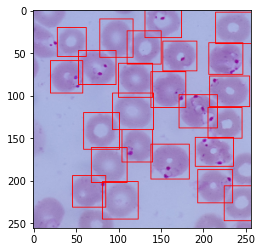

In [552]:
img = cv2.imread(imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]], cv2.IMREAD_COLOR)
list_bbxs = dict_bbxs[imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]]]
img_with_box = bbv.draw_multiple_rectangles(img, [box.tolist()[:4] for box in list_bbxs], bbox_color = (255, 0, 0), thickness=1)
plt.imshow(img_with_box)

In [553]:
with open('../data/pickled/imgs_name.pkl', 'wb') as handle:
    pickle.dump(imgs_name, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/pickled/true_boxes.pkl', 'wb') as handle:
    pickle.dump(true_boxes, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/pickled/dict_bbxs.pkl', 'wb') as handle:
    pickle.dump(dict_bbxs, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/pickled/labels.pkl', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)    

## Polygon to rectangle

In [554]:
filename =  'IMG_20150621_112043'
df_file = df[df['filename'] == filename]
df_file['position'].iloc[-1]

[(4166, 1704),
 (4176, 1688),
 (4184, 1664),
 (4195, 1647),
 (4230, 1633),
 (4272, 1631),
 (4309, 1644),
 (4342, 1679),
 (4341, 1709),
 (4326, 1733),
 (4299, 1758),
 (4265, 1758),
 (4233, 1750),
 (4204, 1735),
 (4174, 1718),
 (4162, 1714)]

In [555]:
rect = df_file['bbx']

In [556]:
df_file['bbx'].tolist()

[[3575, 1304, 3727, 1432],
 [1441, 1202, 1568, 1307],
 [2856, 1398, 2960, 1541],
 [2982, 1460, 3091, 1578],
 [3043, 1651, 3169, 1788],
 [2170, 1937, 2341, 2050],
 [2073, 1836, 2218, 1965],
 [1900, 1873, 2026, 1978],
 [1942, 2102, 2059, 2227],
 [1662, 1906, 1798, 2017],
 [1555, 1781, 1680, 1936],
 [1836, 1731, 2003, 1868],
 [2180, 1712, 2317, 1838],
 [2037, 1745, 2183, 1828],
 [1972, 1613, 2122, 1762],
 [1758, 1743, 1863, 1879],
 [1631, 2139, 1762, 2279],
 [1676, 2264, 1812, 2381],
 [2105, 2169, 2248, 2266],
 [2171, 2075, 2309, 2190],
 [2314, 1846, 2472, 1983],
 [2492, 1789, 2629, 1917],
 [2443, 1567, 2564, 1682],
 [2269, 1504, 2403, 1653],
 [2104, 1636, 2228, 1738],
 [2105, 1531, 2260, 1640],
 [2005, 1454, 2120, 1564],
 [1878, 1525, 2013, 1638],
 [1779, 1612, 1903, 1723],
 [1626, 1601, 1764, 1747],
 [1681, 1476, 1829, 1601],
 [1690, 1362, 1828, 1490],
 [1783, 1320, 1913, 1467],
 [1839, 1280, 1987, 1420],
 [1965, 1267, 2104, 1410],
 [2130, 1385, 2286, 1518],
 [2259, 1309, 2388, 1429],
 

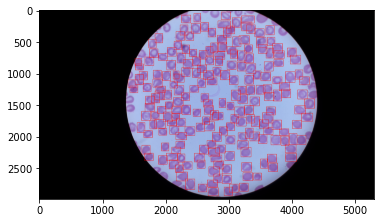

In [557]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
img_with_box = bbv.draw_multiple_rectangles(img, df_file['bbx'].tolist(), bbox_color = (255, 0, 0), thickness=3)
plt.imshow(img_with_box)

# Convert to YOLO format

In [558]:
with open('../data/pickled/imgs_name.pkl', 'rb') as handle:
    imgs_name = pickle.load(handle)
with open('../data/pickled/true_boxes.pkl', 'rb') as handle:
    true_boxes = pickle.load(handle)
with open('../data/pickled/dict_bbxs.pkl', 'rb') as handle:
    dict_bbxs = pickle.load(handle)
with open('../data/pickled/labels.pkl', 'rb') as handle:
    df = pickle.load(handle)    

### Test train split patient level

In [559]:
np.random.seed(2)
train_index = []
for patient_n in df['patient_n_path'].unique():
    df_patient = df.loc[df['patient_n_path'] == patient_n]
    mask = np.random.rand(len(df_patient)) < 0.8
    train_index.extend(df_patient[mask].index)
    print('patient: ', patient_n, ' length train_index: ', len(train_index))

patient:  40  length train_index:  618
patient:  13  length train_index:  1348
patient:  89  length train_index:  2028
patient:  201  length train_index:  3072
patient:  202  length train_index:  3964
patient:  47  length train_index:  4954
patient:  148  length train_index:  5586
patient:  16  length train_index:  6302
patient:  87  length train_index:  6839
patient:  203  length train_index:  7857
patient:  121  length train_index:  8452
patient:  50  length train_index:  9314
patient:  138  length train_index:  10129
patient:  60  length train_index:  10806
patient:  204  length train_index:  11856
patient:  3  length train_index:  12663
patient:  10  length train_index:  13575
patient:  205  length train_index:  14702
patient:  206  length train_index:  15909
patient:  83  length train_index:  16562
patient:  207  length train_index:  17634
patient:  95  length train_index:  18143
patient:  29  length train_index:  18938
patient:  76  length train_index:  19902
patient:  28  length

In [560]:
df['train_test'] = 'test'
df.at[train_index, 'train_test'] = 'train'
df['train_test'].value_counts()

train    157636
test      39298
Name: train_test, dtype: int64

In [561]:
#sanity check
print('percentage train: ', len(df[df['train_test'] == 'train']) / len(df))

percentage train:  0.8004509124884479


In [562]:
#sanity check patient level
for patient_n in df['patient_n_path'].unique():
    df_patient = df.loc[df['patient_n_path'] == patient_n]
    percent_train = len(df_patient[df_patient['train_test'] == 'train']) / len(df_patient)
    print('patient: ', patient_n, ' percentage train: ', percent_train)

patient:  40  percentage train:  0.8015564202334631
patient:  13  percentage train:  0.7969432314410481
patient:  89  percentage train:  0.8095238095238095
patient:  201  percentage train:  0.7963386727688787
patient:  202  percentage train:  0.8221198156682028
patient:  47  percentage train:  0.7983870967741935
patient:  148  percentage train:  0.7959697732997482
patient:  16  percentage train:  0.798216276477146
patient:  87  percentage train:  0.7660485021398002
patient:  203  percentage train:  0.8085782366957903
patient:  121  percentage train:  0.7870370370370371
patient:  50  percentage train:  0.7959372114496768
patient:  138  percentage train:  0.8117529880478087
patient:  60  percentage train:  0.7974087161366313
patient:  204  percentage train:  0.8045977011494253
patient:  3  percentage train:  0.8037848605577689
patient:  10  percentage train:  0.792354474370113
patient:  205  percentage train:  0.7970297029702971
patient:  206  percentage train:  0.7940789473684211
patien

### Test train split patient & img_level

In [563]:
seed_n = 2
random.seed(seed_n)
train_index = []
for patient_n in df['patient_n_path'].unique():
    list_filenames = df.loc[df['patient_n_path'] == patient_n, 'filename'].unique().tolist()
    perct_total = round(len(list_filenames) * 0.8)
    list_filenames_masked = random.sample(list_filenames, perct_total)
    train_index.extend(df.loc[(df['patient_n_path'] == patient_n) & (df['filename'].isin(list_filenames_masked))].index)
    perc_train = len(df.loc[(df['patient_n_path'] == patient_n) & (df['filename'].isin(list_filenames_masked))]) / len(df.loc[(df['patient_n_path'] == patient_n)])
    print('patient: ', patient_n, ' percentage train cells: ', str(perc_train))

patient:  40  percentage train cells:  0.7600518806744487
patient:  13  percentage train cells:  0.8187772925764192
patient:  89  percentage train cells:  0.8023809523809524
patient:  201  percentage train cells:  0.7879481311975591
patient:  202  percentage train cells:  0.7963133640552995
patient:  47  percentage train cells:  0.8032258064516129
patient:  148  percentage train cells:  0.8312342569269522
patient:  16  percentage train cells:  0.7692307692307693
patient:  87  percentage train cells:  0.7617689015691869
patient:  203  percentage train cells:  0.8093725178713265
patient:  121  percentage train cells:  0.8029100529100529
patient:  50  percentage train cells:  0.7839335180055401
patient:  138  percentage train cells:  0.8067729083665338
patient:  60  percentage train cells:  0.7879858657243817
patient:  204  percentage train cells:  0.8022988505747126
patient:  3  percentage train cells:  0.8057768924302788
patient:  10  percentage train cells:  0.8297132927888793
patient:

patient:  238  percentage train cells:  0.8110355253212396
patient:  46  percentage train cells:  0.8009188361408882
patient:  35  percentage train cells:  0.8193891102257637
patient:  5  percentage train cells:  0.8043087971274686
patient:  102  percentage train cells:  0.8226059654631083
patient:  146  percentage train cells:  0.8119935170178282
patient:  129  percentage train cells:  0.8077777777777778
patient:  9  percentage train cells:  0.7528089887640449
patient:  137  percentage train cells:  0.8074277854195323
patient:  115  percentage train cells:  0.804945054945055
patient:  66  percentage train cells:  0.8169014084507042
patient:  42  percentage train cells:  0.7718780727630286
patient:  70  percentage train cells:  0.8104008667388949
patient:  36  percentage train cells:  0.816350710900474
patient:  105  percentage train cells:  0.7936404931862427
patient:  12  percentage train cells:  0.7365269461077845
patient:  120  percentage train cells:  0.8256130790190735
patient:  

In [564]:
df['train_test'] = 'test'
df.at[train_index, 'train_test'] = 'train'
df['train_test'].value_counts()

train    157849
test      39085
Name: train_test, dtype: int64

In [565]:
#sanity check
print('percentage train: ', len(df[df['train_test'] == 'train']) / len(df))

percentage train:  0.8015324931195222


In [566]:
#sanity check patient level
for patient_n in df['patient_n_path'].unique():
    df_patient = df.loc[df['patient_n_path'] == patient_n]
    percent_train = len(df_patient[df_patient['train_test'] == 'train']) / len(df_patient)
    print('patient: ', patient_n, ' percentage train: ', percent_train)

patient:  40  percentage train:  0.7600518806744487
patient:  13  percentage train:  0.8187772925764192
patient:  89  percentage train:  0.8023809523809524
patient:  201  percentage train:  0.7879481311975591
patient:  202  percentage train:  0.7963133640552995
patient:  47  percentage train:  0.8032258064516129
patient:  148  percentage train:  0.8312342569269522
patient:  16  percentage train:  0.7692307692307693
patient:  87  percentage train:  0.7617689015691869
patient:  203  percentage train:  0.8093725178713265
patient:  121  percentage train:  0.8029100529100529
patient:  50  percentage train:  0.7839335180055401
patient:  138  percentage train:  0.8067729083665338
patient:  60  percentage train:  0.7879858657243817
patient:  204  percentage train:  0.8022988505747126
patient:  3  percentage train:  0.8057768924302788
patient:  10  percentage train:  0.8297132927888793
patient:  205  percentage train:  0.804101838755304
patient:  206  percentage train:  0.8111842105263158
patie

In [567]:
df.head()

Patient no - Cell no        cell     comment annotation_type  \
0                  3-1  Uninfected  No_comment         Polygon   
1                  3-2  Uninfected  No_comment         Polygon   
2                  3-3  Uninfected  No_comment         Polygon   
3                  3-4  Uninfected  No_comment         Polygon   
4                  3-5  Uninfected  No_comment         Polygon   

  Number of points                                           position  \
0               14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1               15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2               14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3               14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4               14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   

              filename                                           txt_path  \
0  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                            img_path                     bbx  \
0  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   [2905, 33, 3033, 131]   
1  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2951, 141, 3071, 272]   
2  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2658, 135, 2801, 276]   
3  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2332, 137, 2454, 265]   
4  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2499, 140, 2631, 272]   

   patient_n_path                                  adjusted_position  \
0              40  [(1652, 29), (1673, 24), (1710, 26), (1733, 35...   
1              40  [(1731, 132), (1711, 135), (1690, 148), (1674,...   
2              40  [(1448, 126), (1422, 135), (1390, 156), (1379,...   
3              40  [(1097, 128), (1071, 140), (1052, 160), (1050,...   
4              40  [(1293, 131), (1266, 136), (1240, 152), (1218,...   

                                 img_path_fit2circle  \
0  ../data/fit_to_circle/cropped_P40_IMG_20150817...   
1  ../data/fit_to_circle/cropped_P40_IMG_20150817...   
2  ../data/fit_to_circle/cropped_P40_IMG_20150817...   
3  ../data/fit_to_circle/cropped_P40_IMG_20150817...   
4  ../data/fit_to_circle/cropped_P40_IMG_20150817...   

                                mask_path_fit2circle            adjusted_bbx  \
0  ../data/fit_to_circle/masks_cropped_P40_IMG_20...   [1623, 24, 1751, 122]   
1  ../data/fit_to_circle/masks_cropped_P40_IMG_20...  [1669, 132, 1789, 263]   
2  ../data/fit_to_circle/masks_cropped_P40_IMG_20...  [1376, 126, 1519, 267]   
3  ../data/fit_to_circle/masks_cropped_P40_IMG_20...  [1050, 128, 1172, 256]   
4  ../data/fit_to_circle/masks_cropped_P40_IMG_20...  [1217, 131, 1349, 263]   

                                    mask_path train_test  
0  ../data/masks/mask_IMG_20150817_103139.png      train  
1  ../data/masks/mask_IMG_20150817_103139.png      train  
2  ../data/masks/mask_IMG_20150817_103139.png      train  
3  ../data/masks/mask_IMG_20150817_103139.png      train  
4  ../data/masks/mask_IMG_20150817_103139.png      train

### Save Polygon to YOLO for Poly Yolo

In [568]:
# produce textfiles for all elements in the train and validation dataset
# FORMAT:
# path_to\image1.jpg x1,y1,x2,y2,class,p1x,p1y,pnx,pny x1,y1,x2,y2,class,p1x,p1y,pnx,pny
previous_row = '1'
file = open('../data/fit_to_circle/poly_yolo_train.txt',"w+")
for img_path_fit_to_circle in df.loc[(df['annotation_type'] == 'Polygon') &  
                                        (df['train_test'] == 'train'), 'img_path_fit2circle'].unique():
    #print(img_path_fit_to_circle)
    file.write(str(img_path_fit_to_circle) + ' ')
    for index, row in df[df['img_path_fit2circle'] == img_path_fit_to_circle].iterrows():
        if row is not previous_row:
            file.write(str(row['adjusted_bbx'][0]) + ',' +
                       str(row['adjusted_bbx'][1]) + ',' +
                       str(row['adjusted_bbx'][2]) + ',' +
                       str(row['adjusted_bbx'][3]) + ',' +
                       str(row['cell']) + ','  +
                        ''.join(str(str(poly[0]) + ',' + str(poly[1]) + ',') for poly in row['adjusted_position'])                        + ' ')
    file.write('\n')
    previous_row = row
file.close()

In [569]:
# produce textfiles for all elements in the train and validation dataset
# FORMAT:
# path_to\image1.jpg x1,y1,x2,y2,class,p1x,p1y,pnx,pny x1,y1,x2,y2,class,p1x,p1y,pnx,pny
previous_row = '1'
file = open('../data/fit_to_circle/poly_yolo_test.txt',"w+")
for img_path_fit_to_circle in df.loc[(df['annotation_type'] == 'Polygon') &  
                                        (df['train_test'] == 'test'), 'img_path_fit2circle'].unique():
    #print(img_path_fit_to_circle)
    file.write(str(img_path_fit_to_circle) + ' ')
    for index, row in df[df['img_path_fit2circle'] == img_path_fit_to_circle].iterrows():
        if row is not previous_row:
            file.write(str(row['adjusted_bbx'][0]) + ',' +
                       str(row['adjusted_bbx'][1]) + ',' +
                       str(row['adjusted_bbx'][2]) + ',' +
                       str(row['adjusted_bbx'][3]) + ',' +
                       str(row['cell']) + ','  +
                        ''.join(str(str(poly[0]) + ',' + str(poly[1]) + ',') for poly in row['adjusted_position'])                        + ' ')
    file.write('\n')
    previous_row = row
file.close()